In [14]:
import numpy as np
from matplotlib import pyplot as plt 
from matplotlib import cm 
from matplotlib import colors as mclr
from scipy import integrate as intg
from scipy import linalg as lnal

import pickle

plt.rc('figure', dpi=300)
plt.rc('font', family = 'Times New Roman')
plt.rc('font', size = 14)
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=18)
plt.rc('lines', linewidth=0.3)
plt.rc('lines',marker='.')

dataDir = "../data/"
figDir = "../figures/"

one = np.eye(2,dtype=complex)
tau1 = np.array([[0.j,1.],[1.,0.j]],dtype=complex)
tau2 = np.array([[0.,-1.j],[1.j,0.]],dtype=complex)
tau3 = -1.j*tau1@tau2


In [15]:
def H(p,mu,tperp,tpar,B):
    h1 =  -mu*one
    h2 = -tperp*tau1
    h3 = -2.*tpar*lnal.cosm(p*one - 0.5*B*tau3)

    return h1+h2+h3

def nel(h,t):
    return np.linalg.inv(np.exp(h/t)+one)

def nho(h,t):
    return np.linalg.inv(np.exp(-h/t)+one)

def integrand(p,q,t,mu,tperp,tpar,B):
    h1 = H(p-q/2,mu,tperp,tpar,B)
    h2 = H(p+q/2,mu,tperp,tpar,B)
    
    n1 = nel(h1,t)
    n2 = nho(h2,t)
    
    return np.trace(n1@tau2@n2@tau2)

def PiHall(q,t,mu,tperp,tpar,B):
    
    return intg.quad(integrand,-np.pi,np.pi,args=(q,t,mu,tperp,tpar,B))[0]

In [ ]:
### Interfacing w/multithreading
def PiHallFile(q,t,mu,tperp,tpar,B,save_filename):
    result = PiHall(q,t,mu,tperp,tpar,B)

    
    with open(save_filename,'wb') as f:
        
        pickle.dump(result,f)
        
    

In [43]:
tpar = 1.0
tperp = 0.23
temp = 0.005

nummus = 15
mus= np.linspace(-2.*tpar,2.*tpar,nummus)

numBs = 11
Bs = np.linspace(0.,2.*np.pi,numBs)


numqs = 50
qs = np.linspace(-np.pi,np.pi,numqs)

Piqs = np.zeros((nummus,numBs,numqs),dtype=complex)
Eqs = np.zeros((nummus,numBs,numqs,2))

for i in range(nummus):
    mu = mus[i]
    
    for j in range(numBs):
        B = Bs[j]
        
        for k in range(numqs):
            q = qs[k]
            Piqs[i,j,k] = PiHall(q,temp,mu,tperp,tpar,B)
            Eqs[i,j,k,:] = np.linalg.eigh(H(q,mu,tperp,tpar,B))[0]

/usr/lib/python3/dist-packages/scipy/integrate/_quadpack_py.py:463: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)
/tmp/ipykernel_77724/4161610290.py:9: RuntimeWarning: overflow encountered in exp
  return np.linalg.inv(np.exp(h/t)+one)
/tmp/ipykernel_77724/4161610290.py:25: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return intg.quad(integrand,-np.pi,np.pi,args=(q,t,mu,tperp,tpar,B))[0]
/tmp/ipykernel_77724/4161610290.py:25: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose int

LinAlgError: Singular matrix

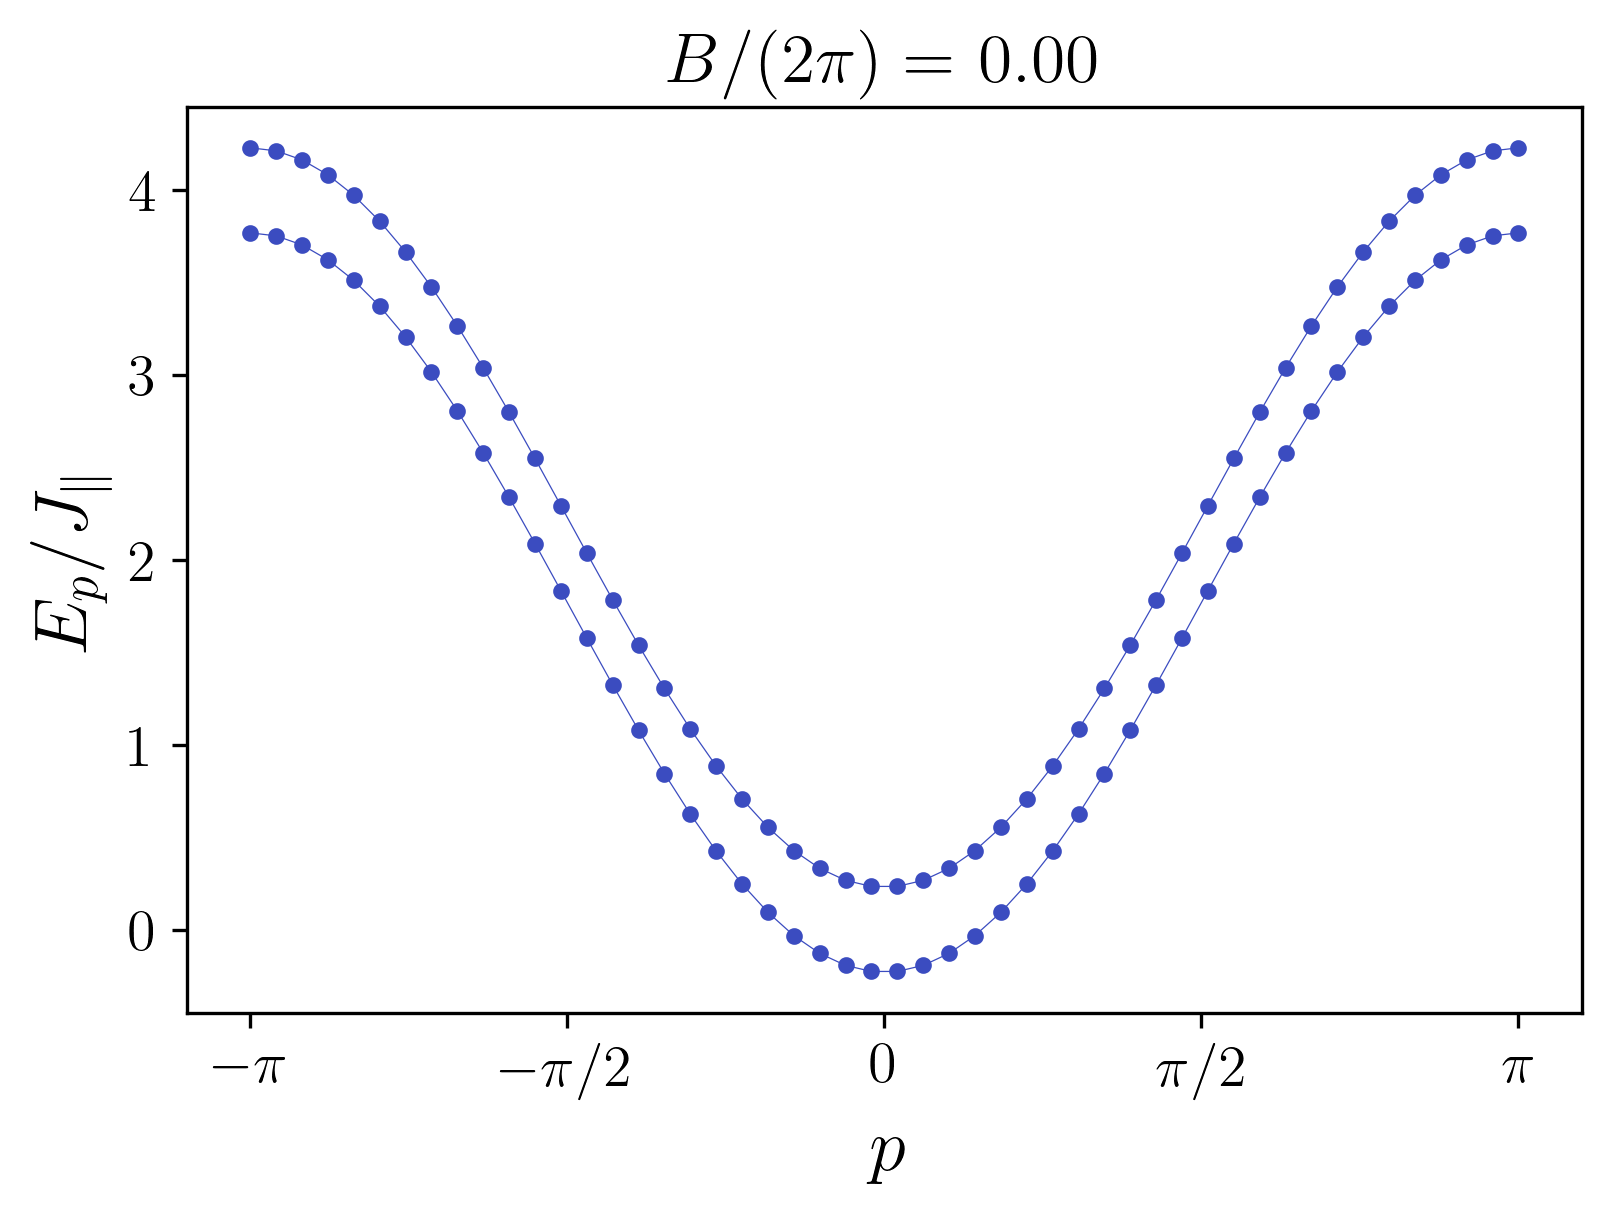

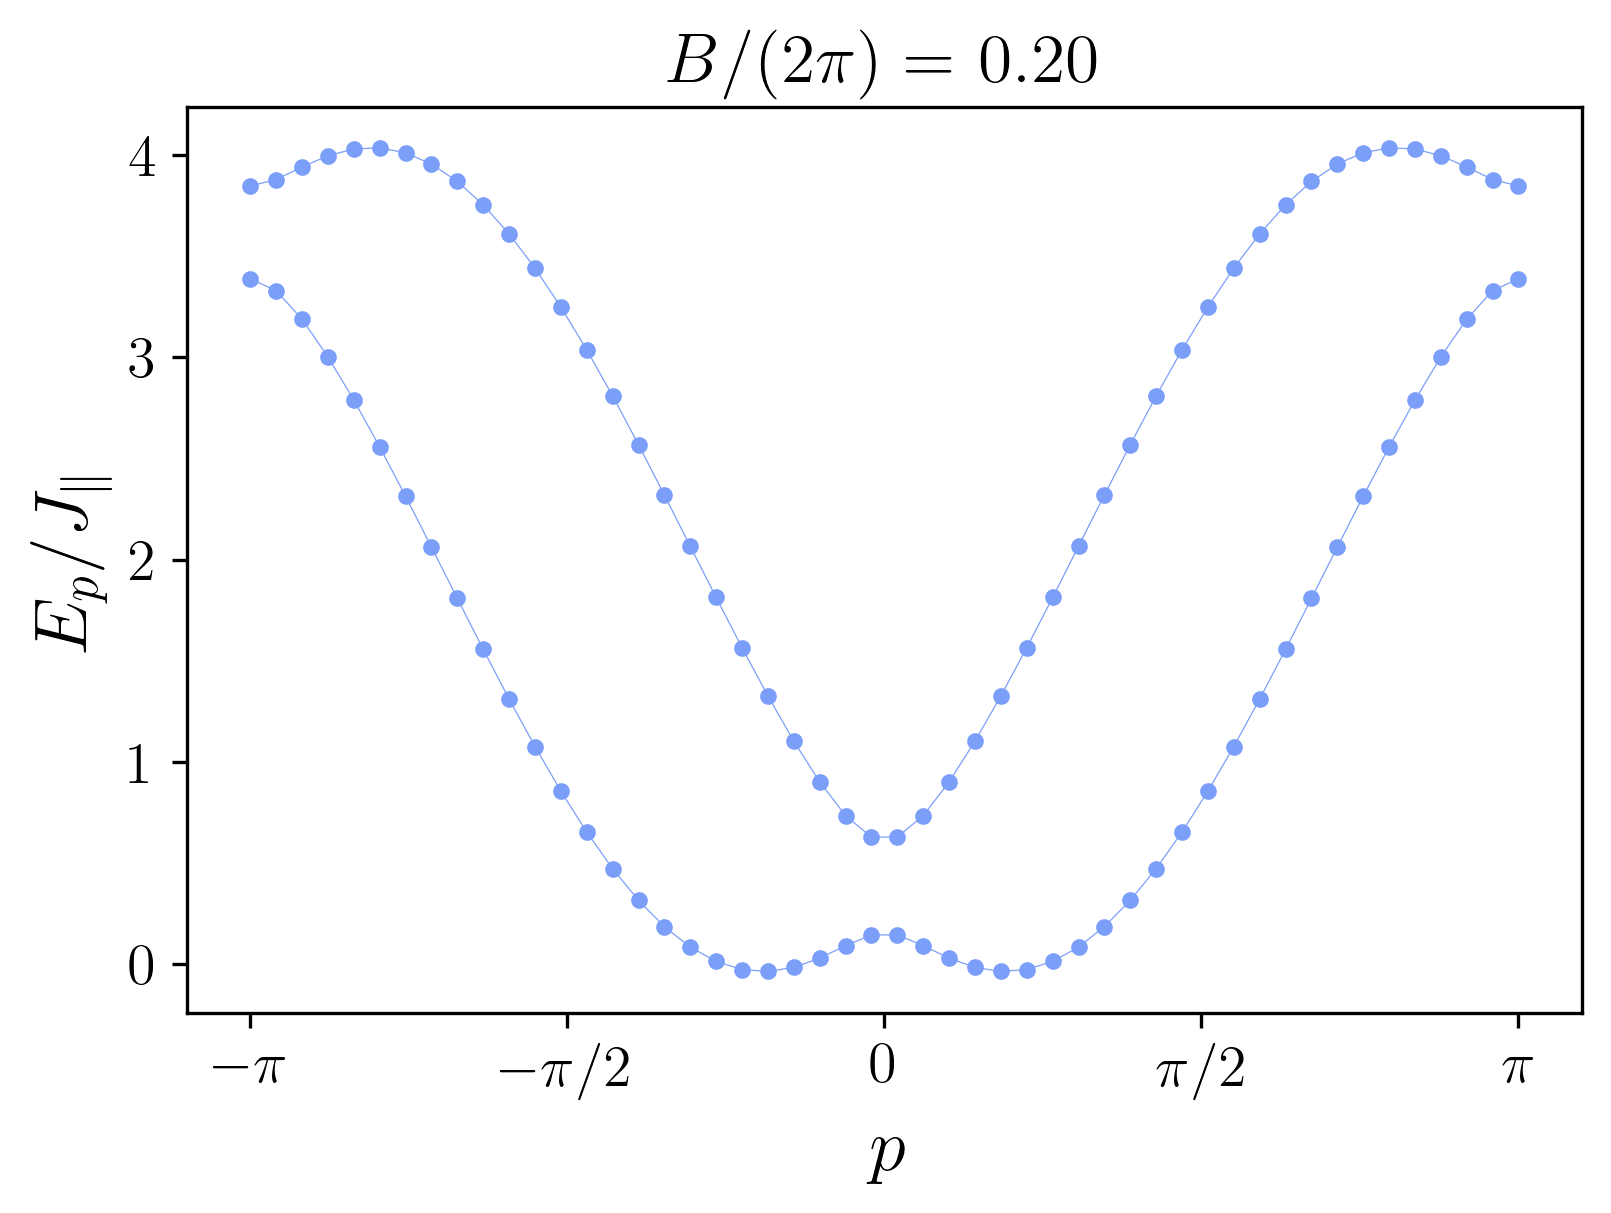

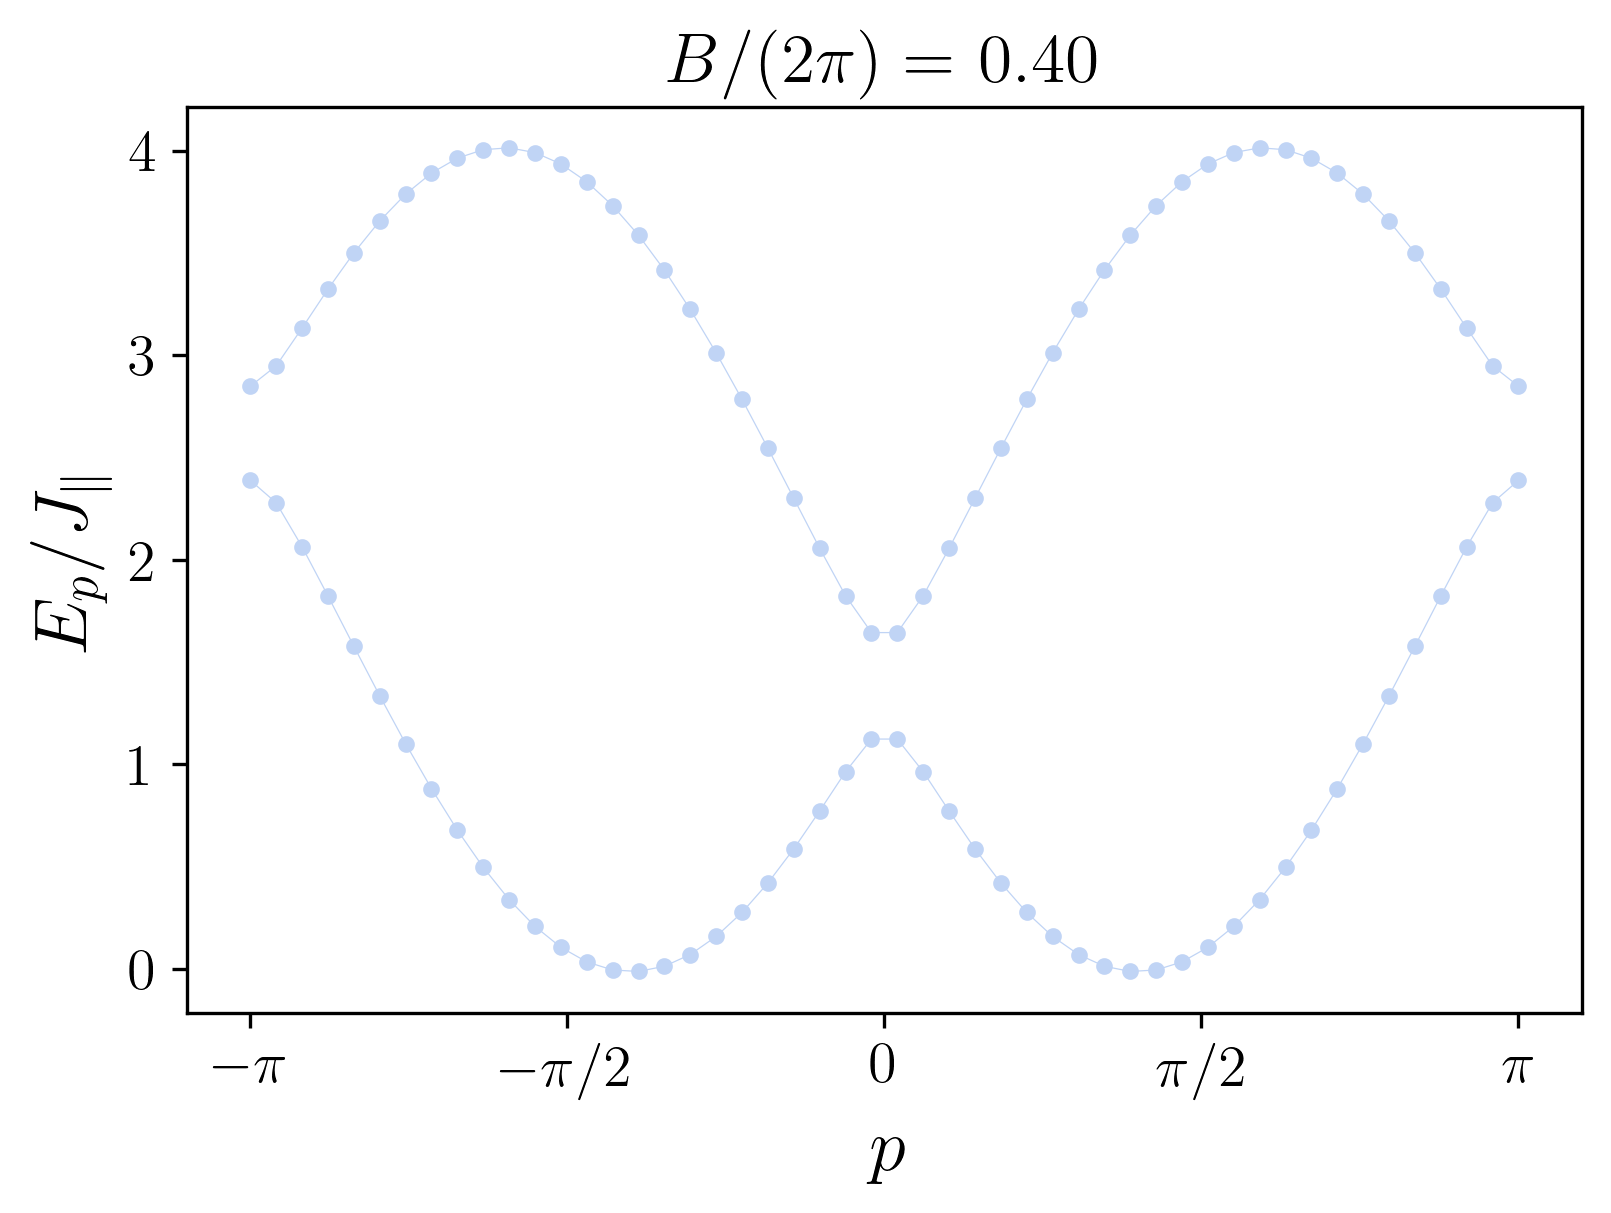

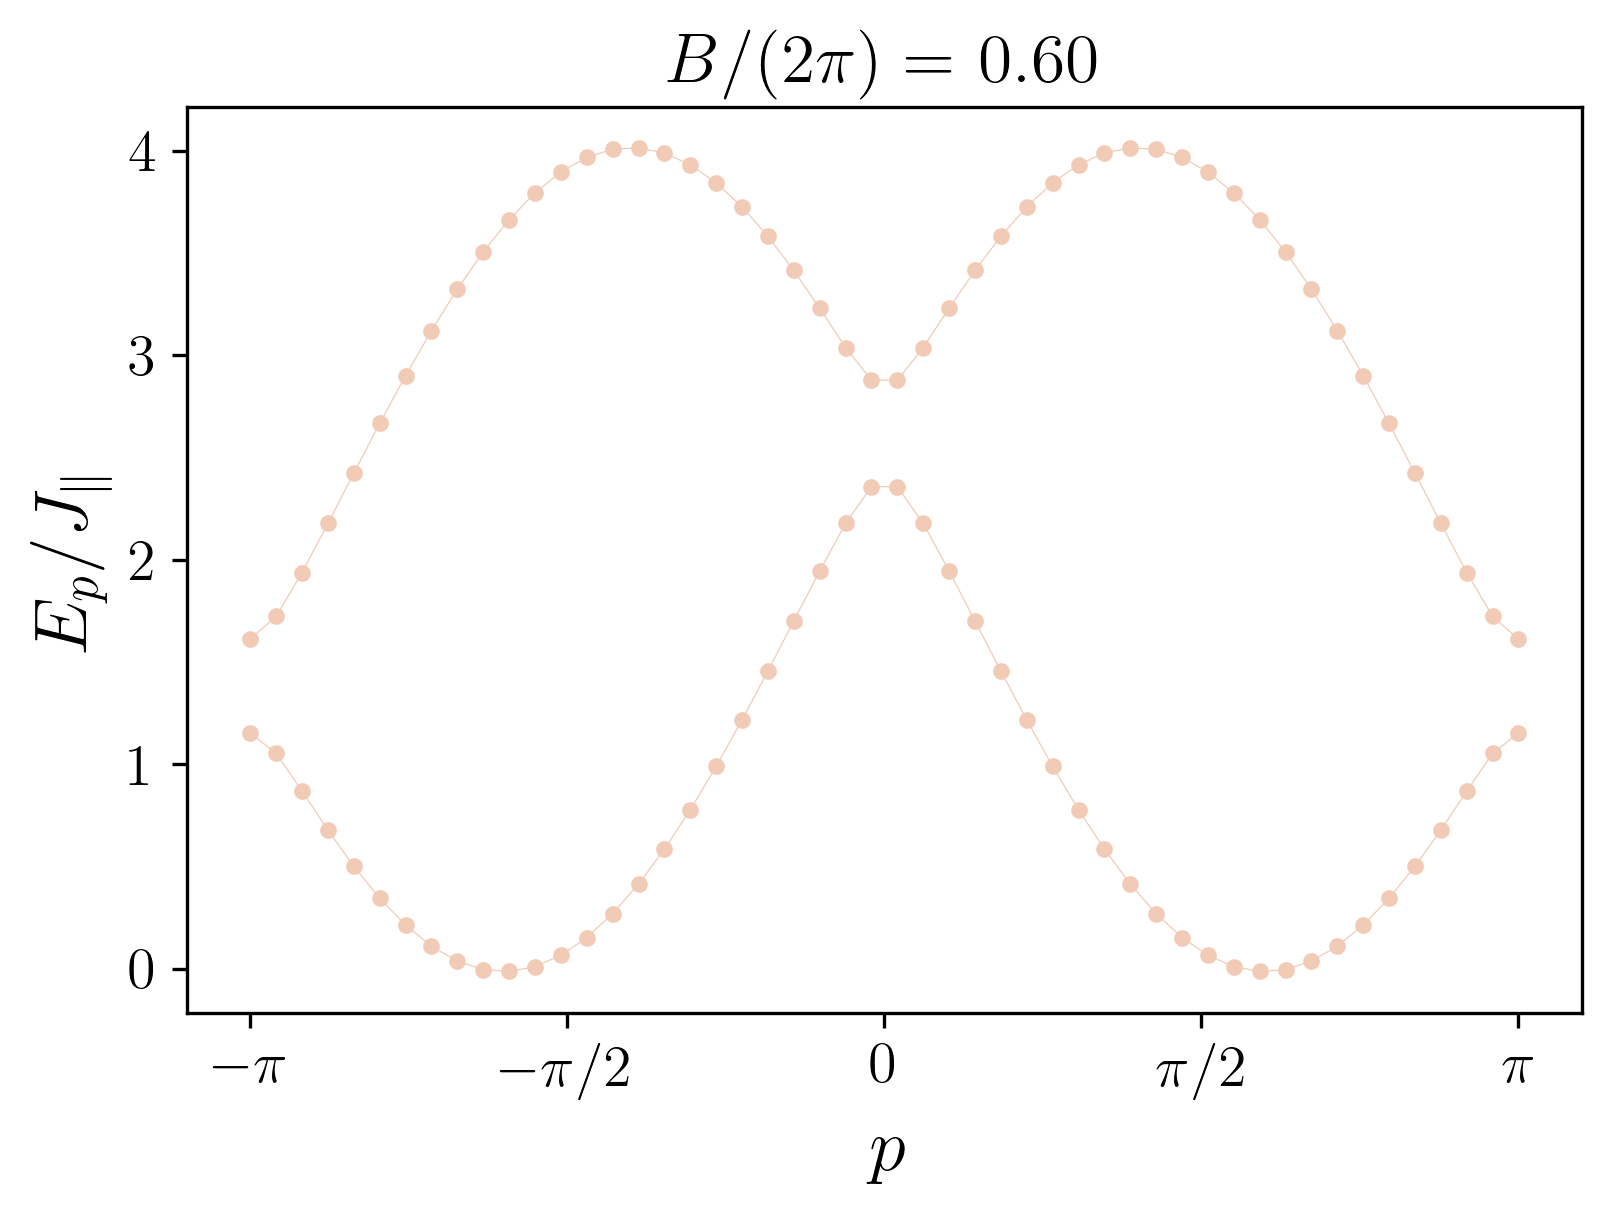

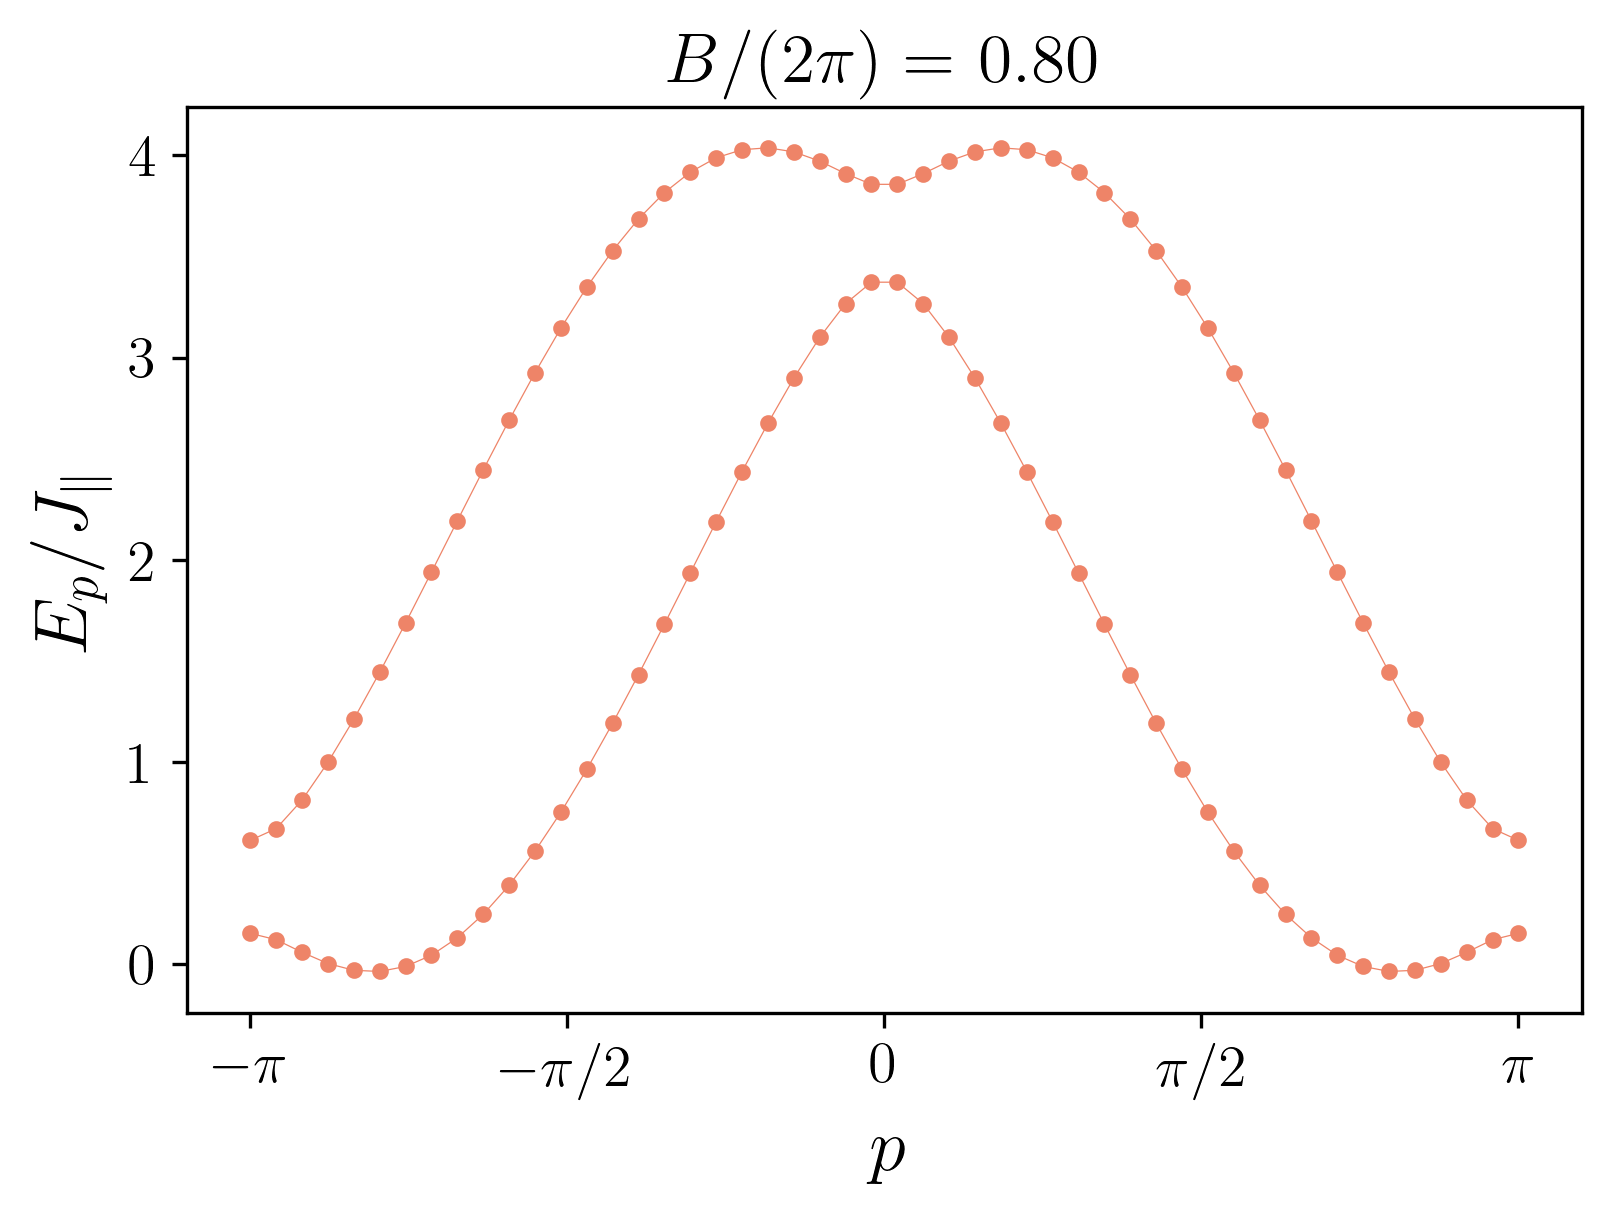

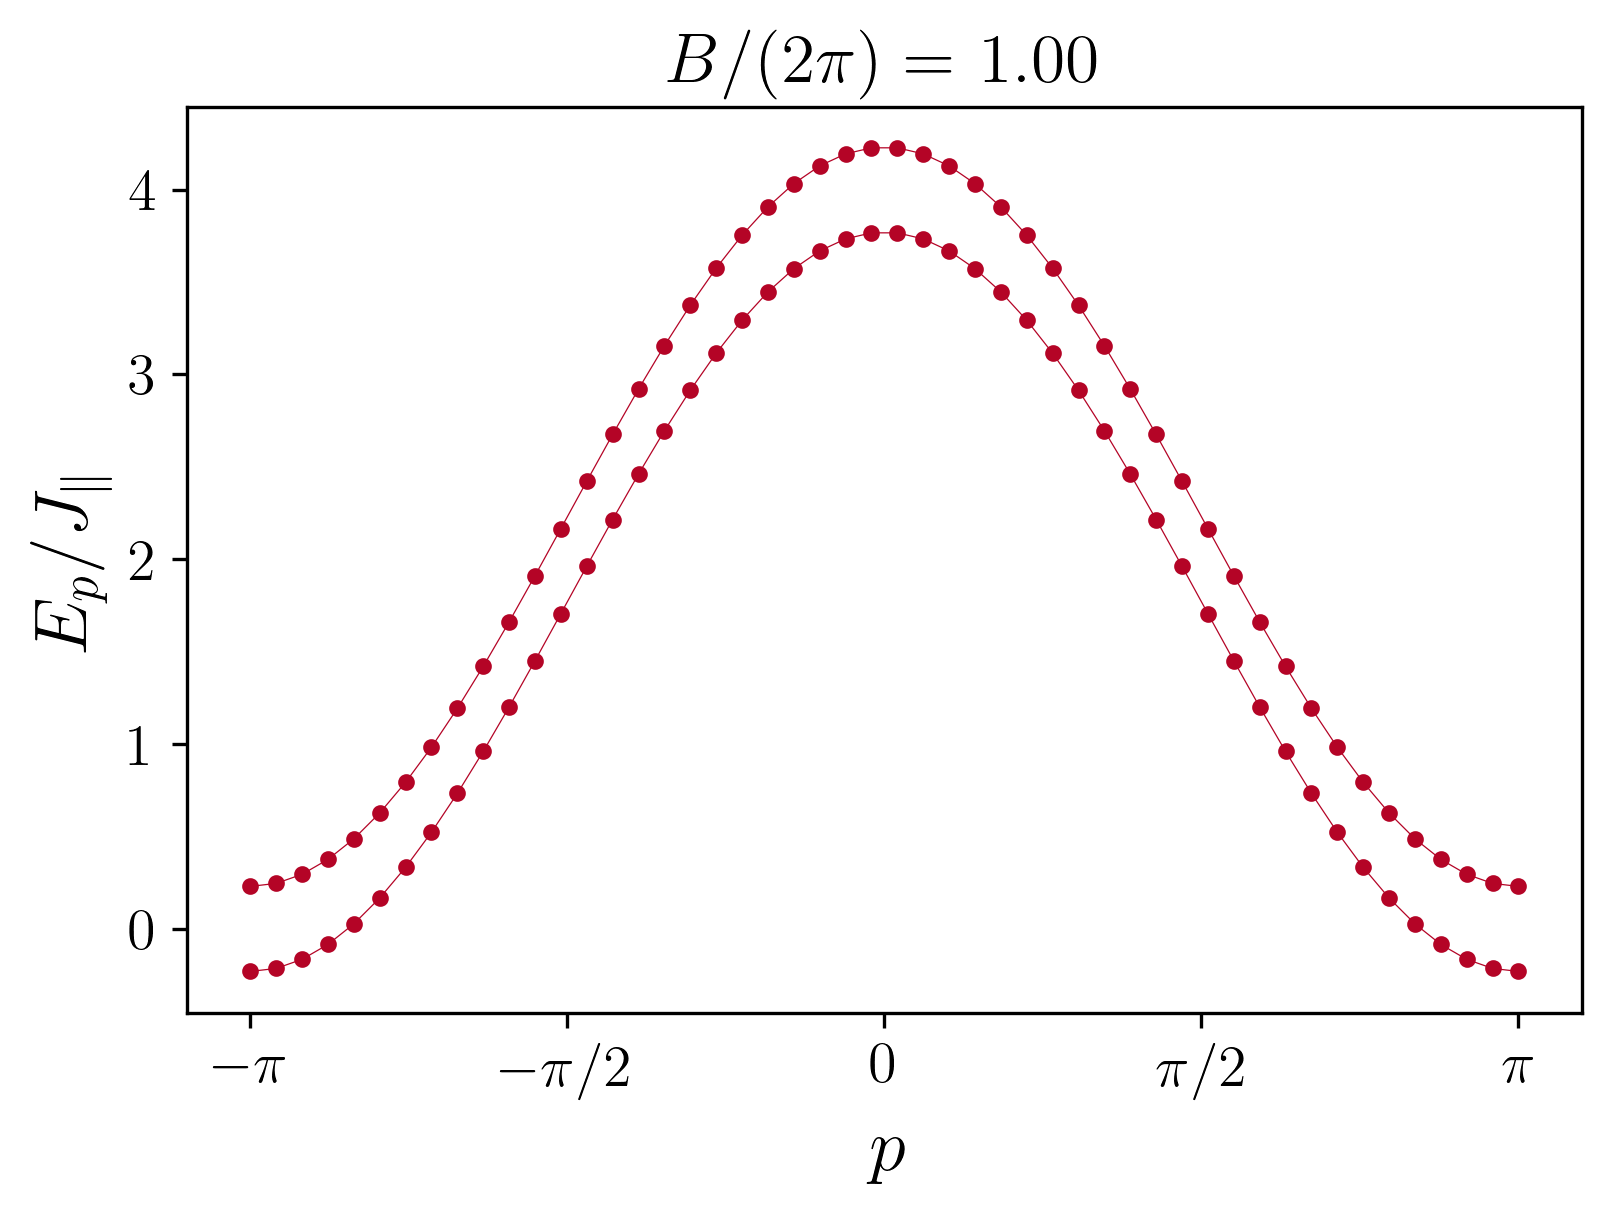

In [44]:
saveFig = True

B_plot_list = [0,2,4,6,8,10]

cs = cm.coolwarm(np.linspace(0.,1.,len(B_plot_list)))

i = 0
for j in B_plot_list:
    plt.plot(qs,Eqs[0,j,:,0],c=cs[i])
    plt.plot(qs,Eqs[0,j,:,1],c=cs[i])
    i+=1
    
    plt.title(r'$B/(2\pi)= $ '+"{b:0.2f}".format(b=Bs[j]/(2.*np.pi) ) )
    
    plt.xlabel(r'$p$')
    plt.xticks([-np.pi,-np.pi/2.,0.,np.pi/2, np.pi],[r'$-\pi$',r'$-\pi/2$',r'$0$',r'$\pi/2$',r'$\pi$'])
    plt.ylabel(r'$E_p/J_\parallel$')

    if saveFig:
        plt.savefig(figDir+"spectrum_B={b:0.2f}.pdf".format(b=Bs[j]),bbox_inches='tight')
    plt.show()
    
saveFig = False

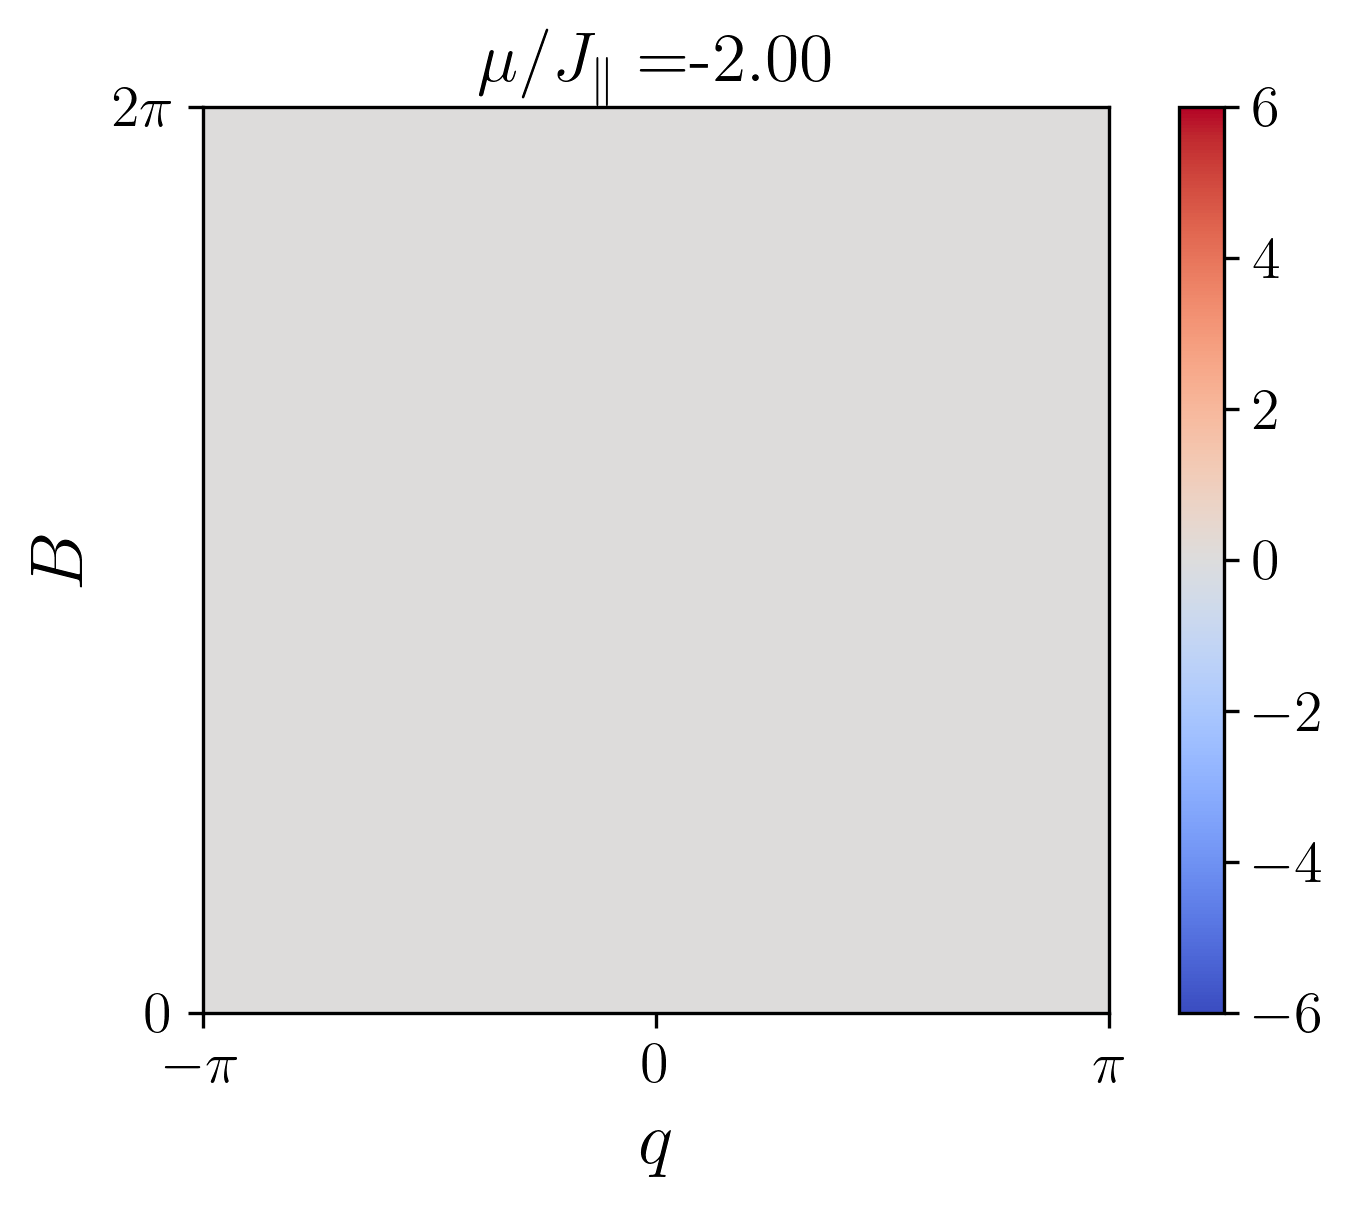

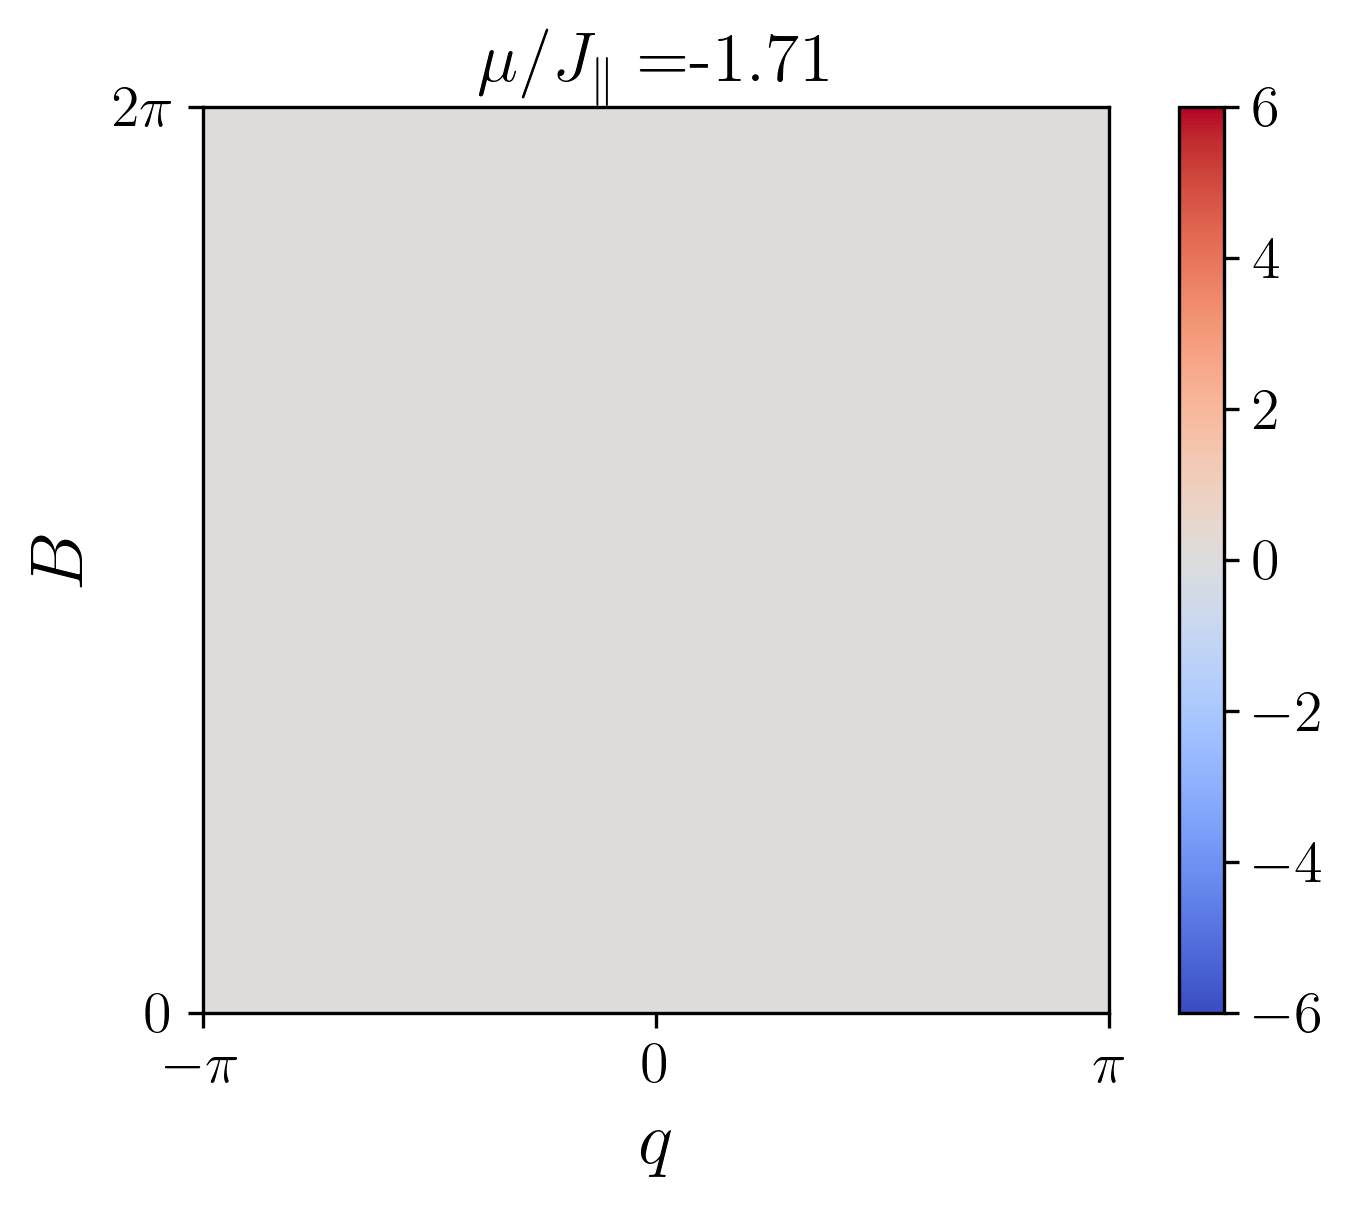

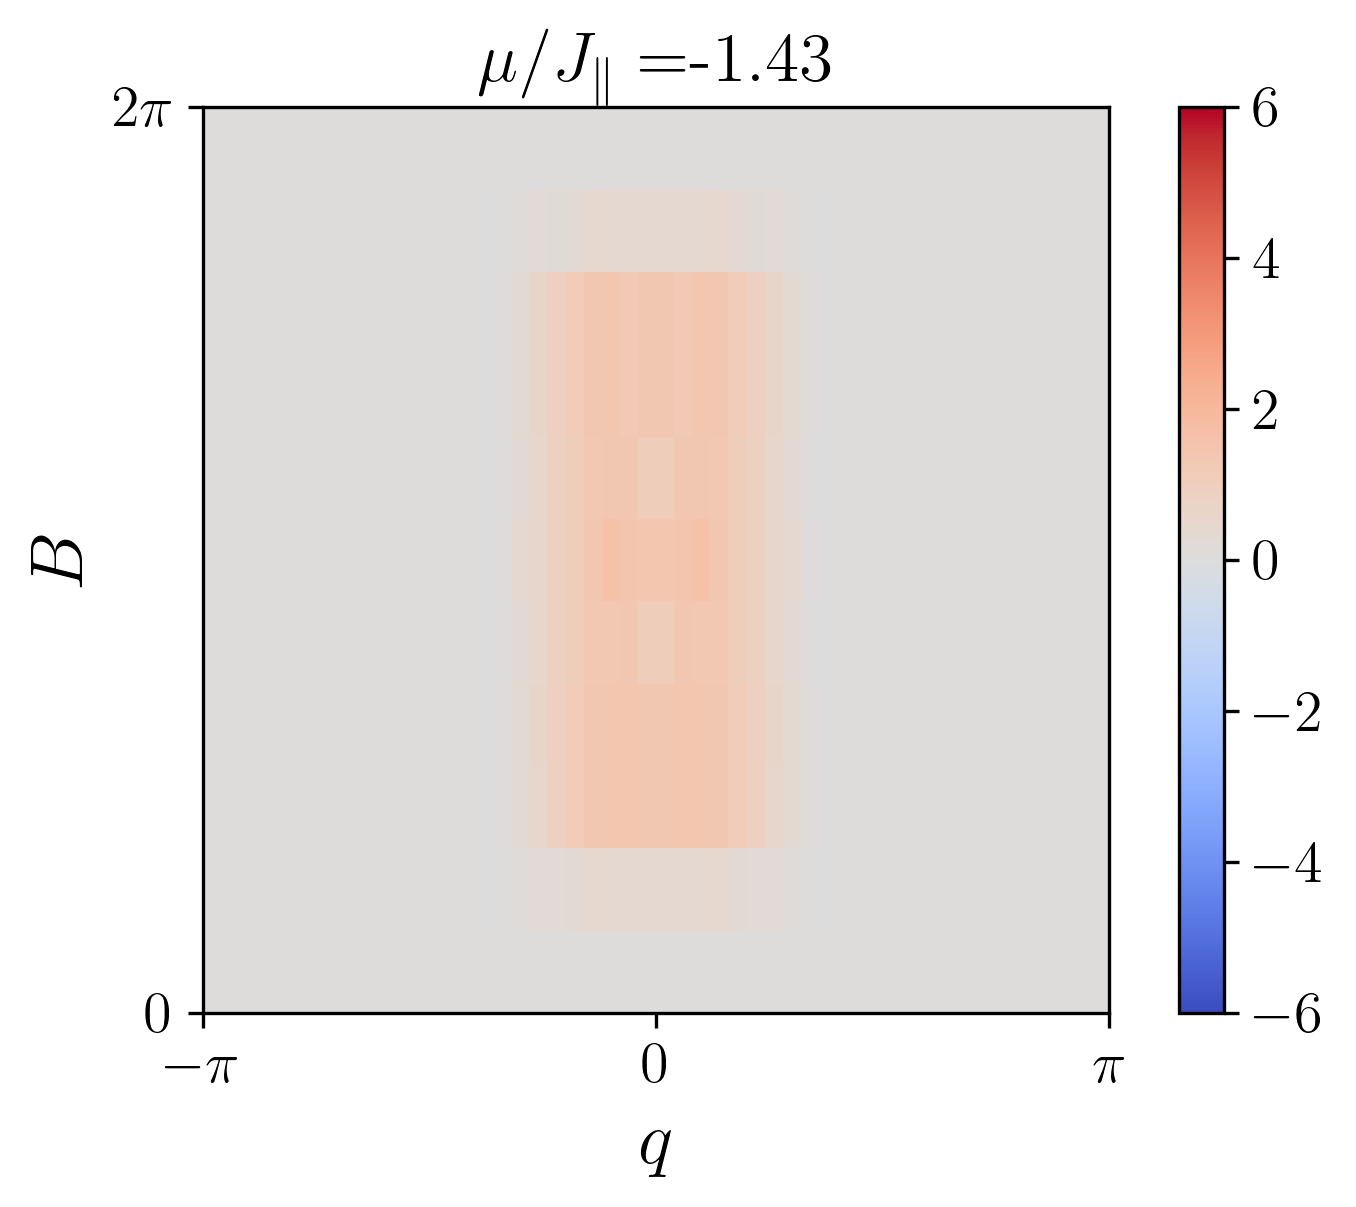

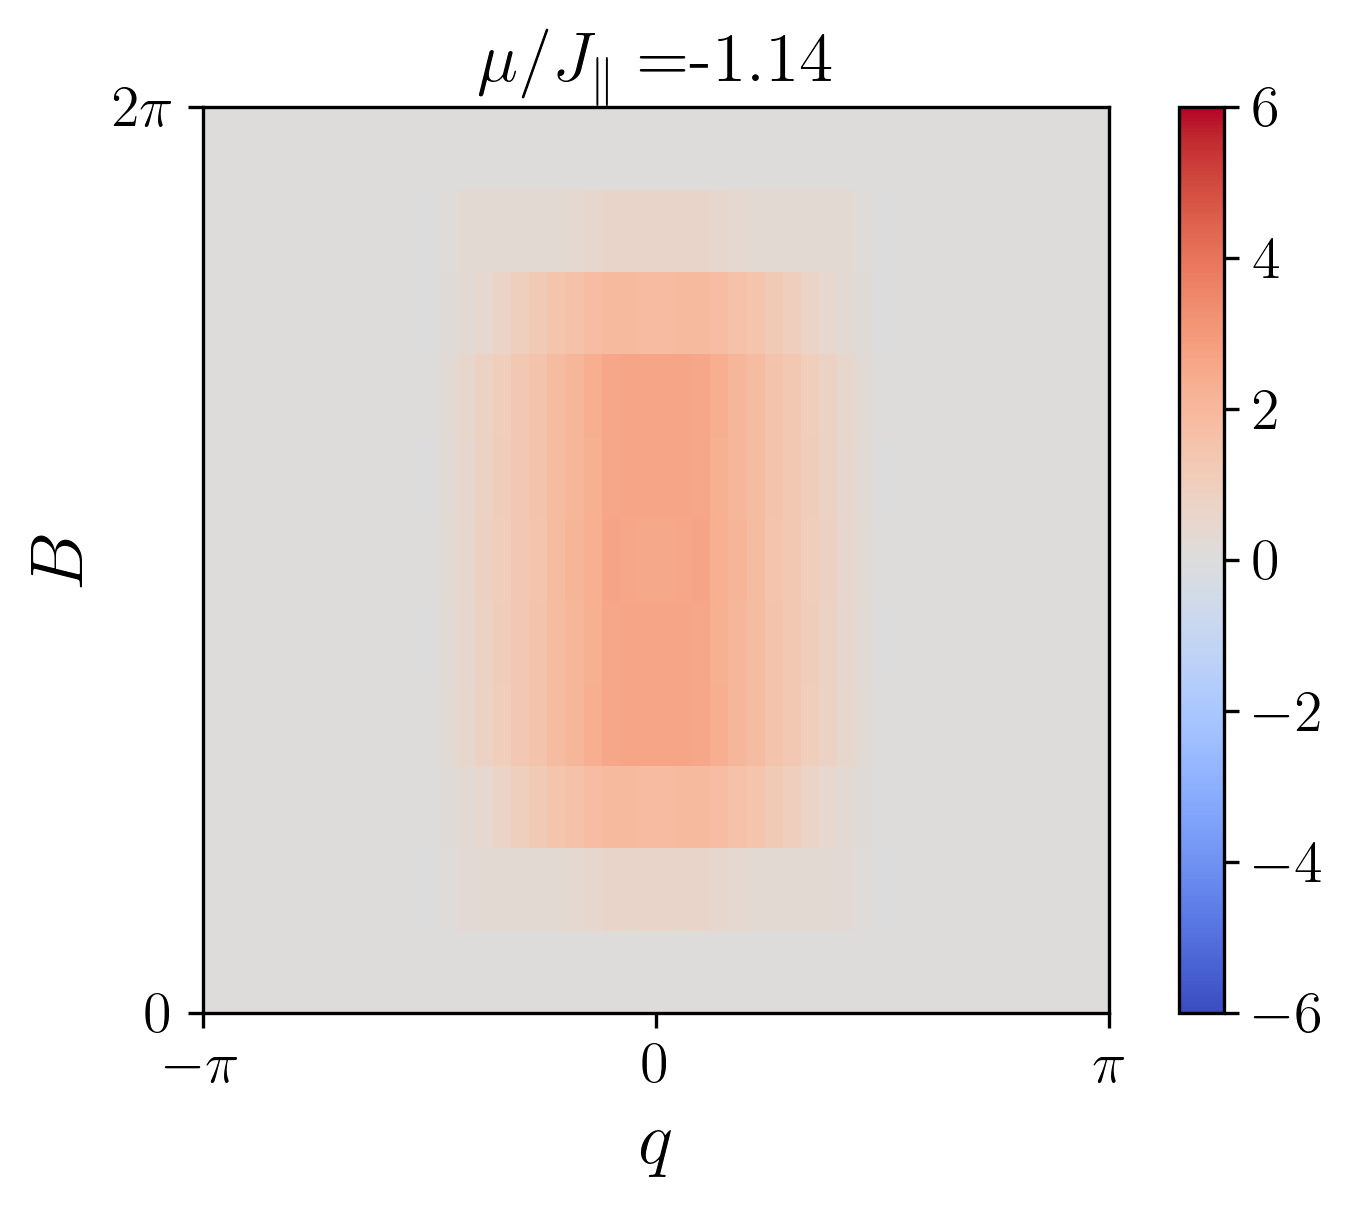

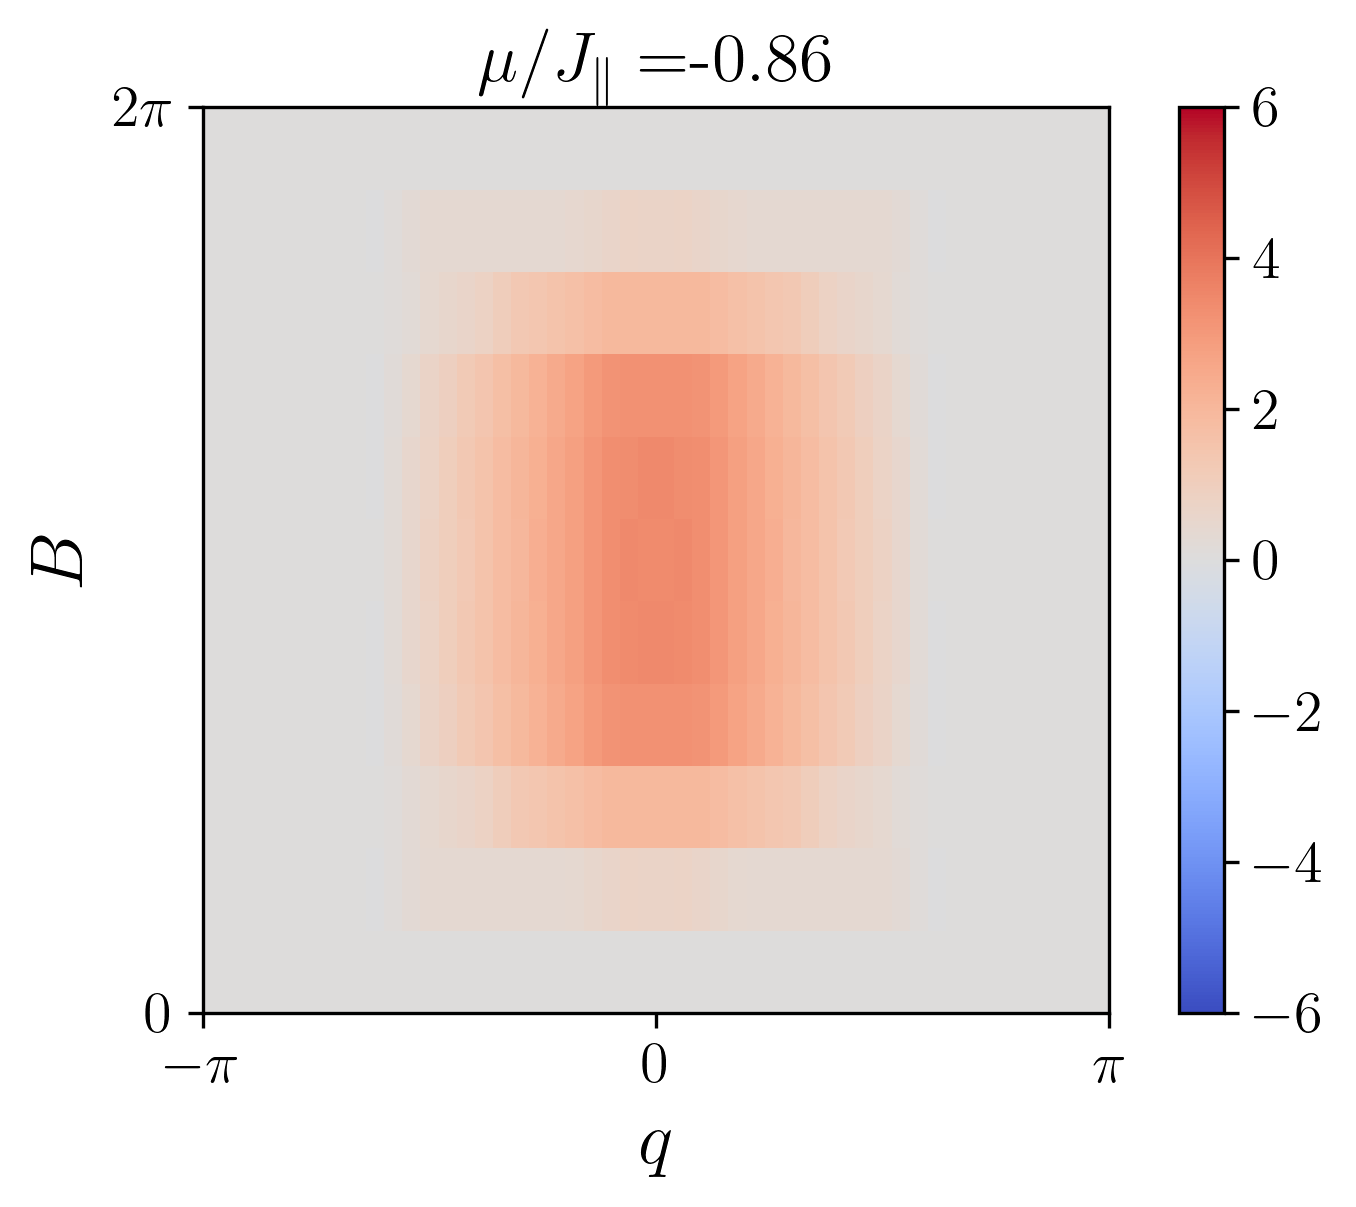

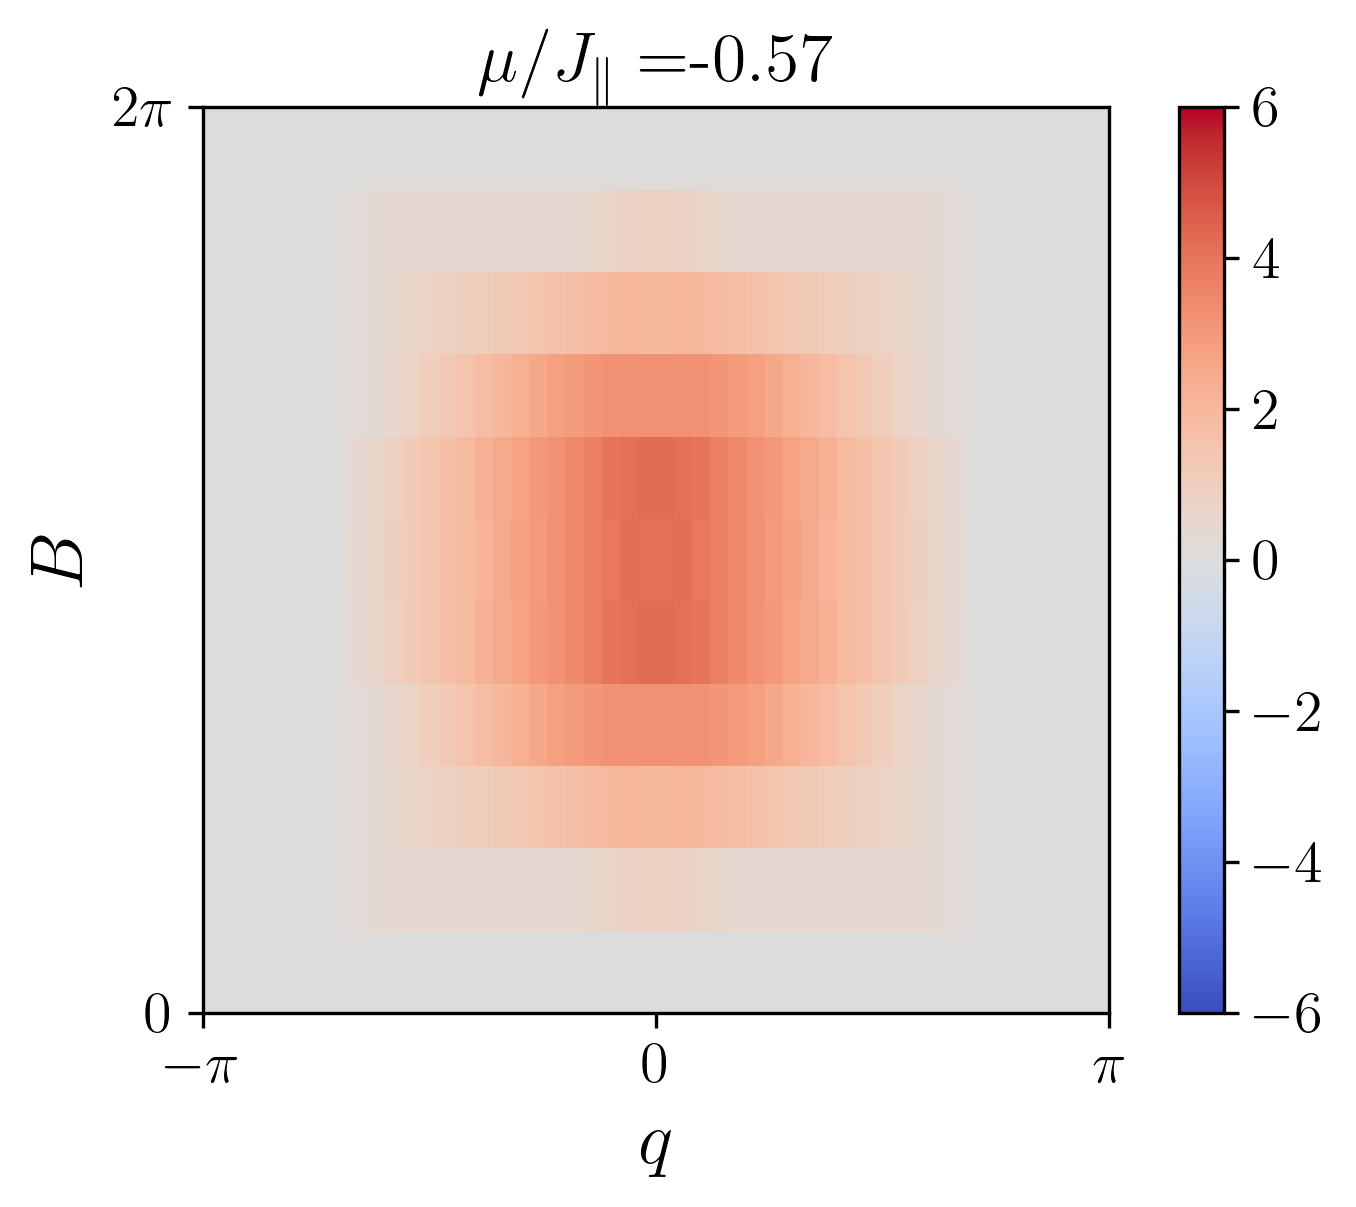

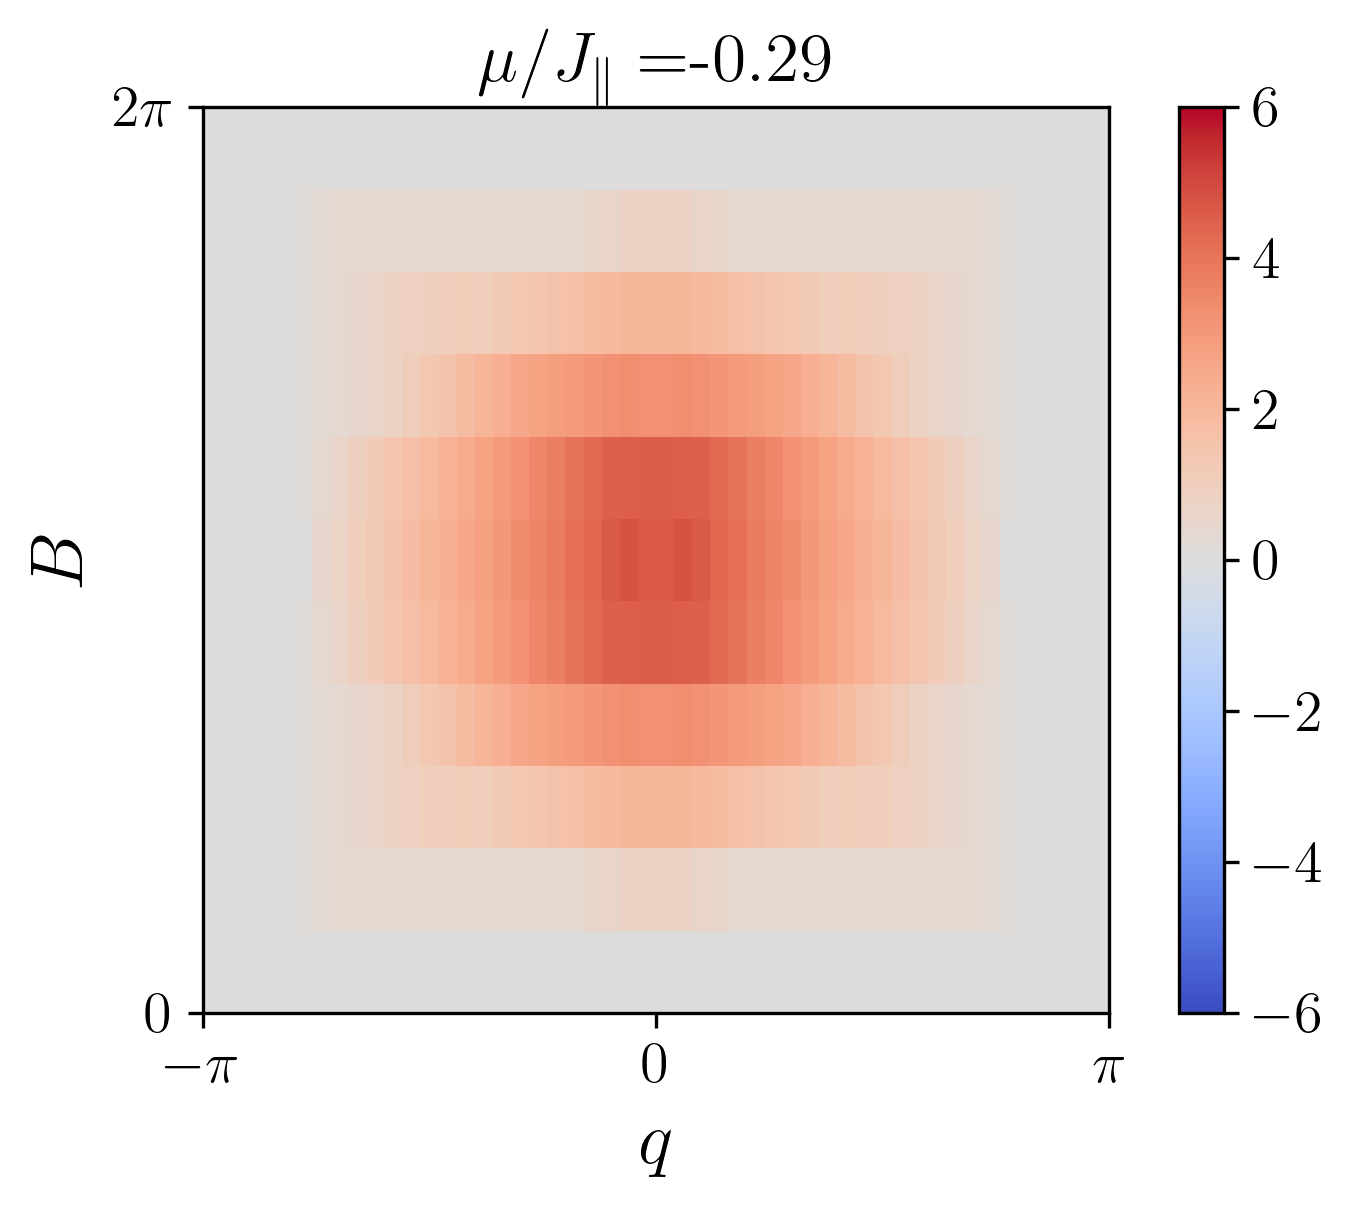

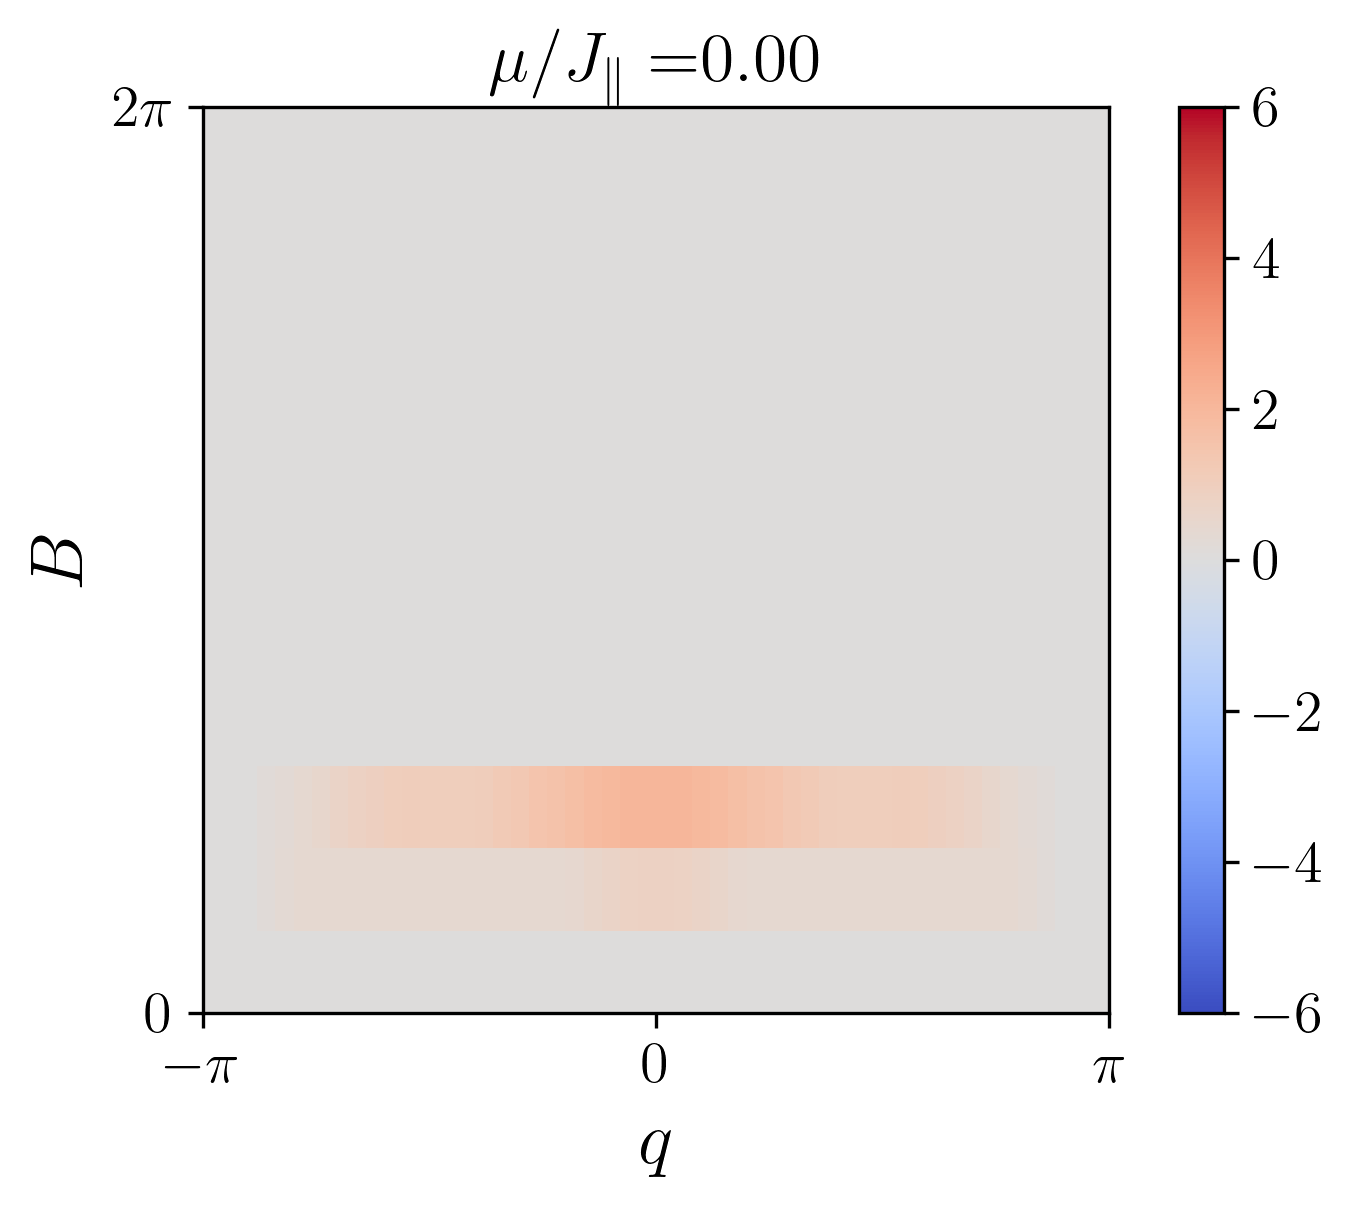

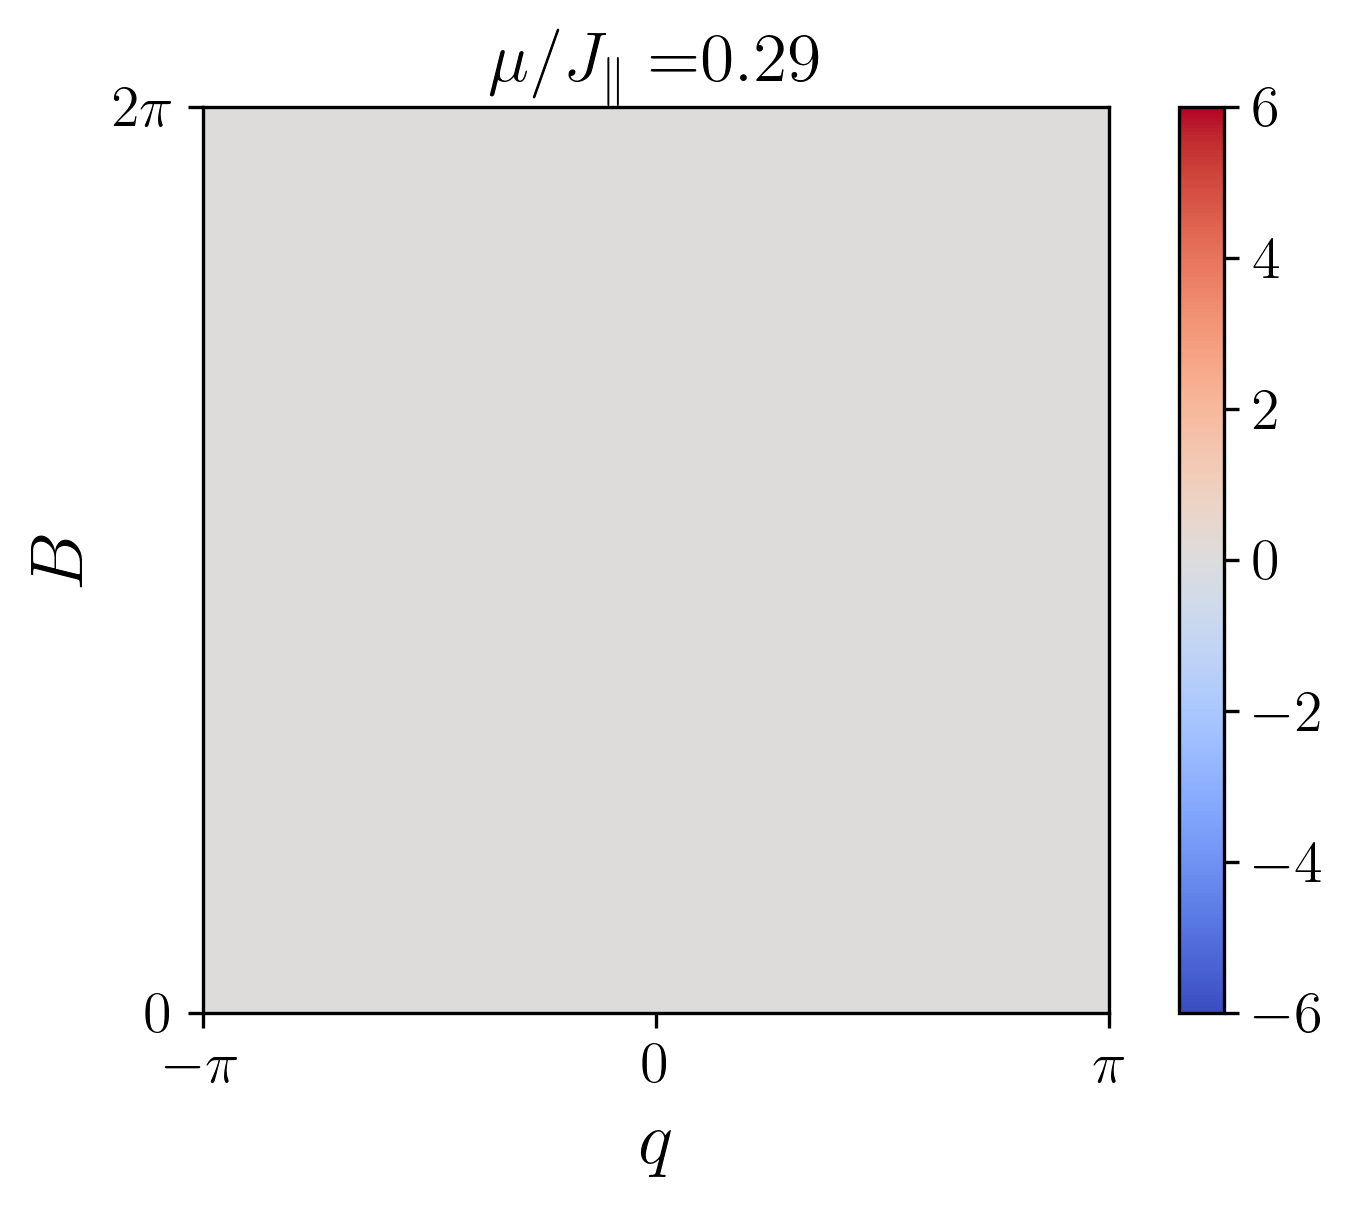

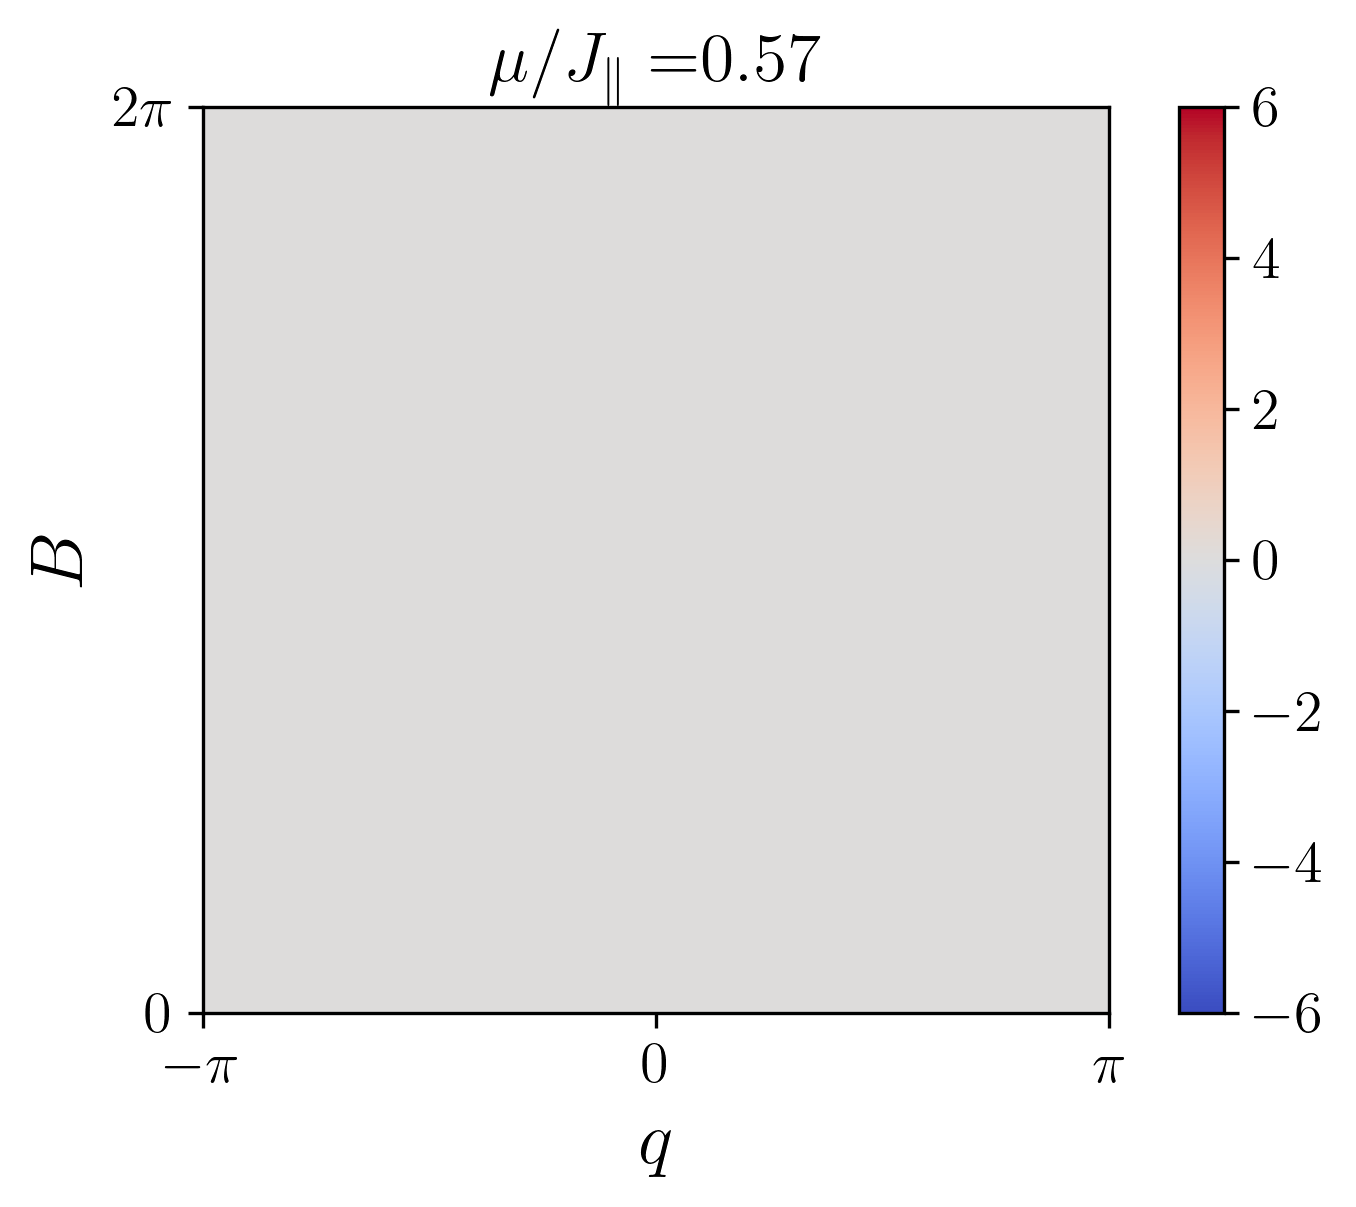

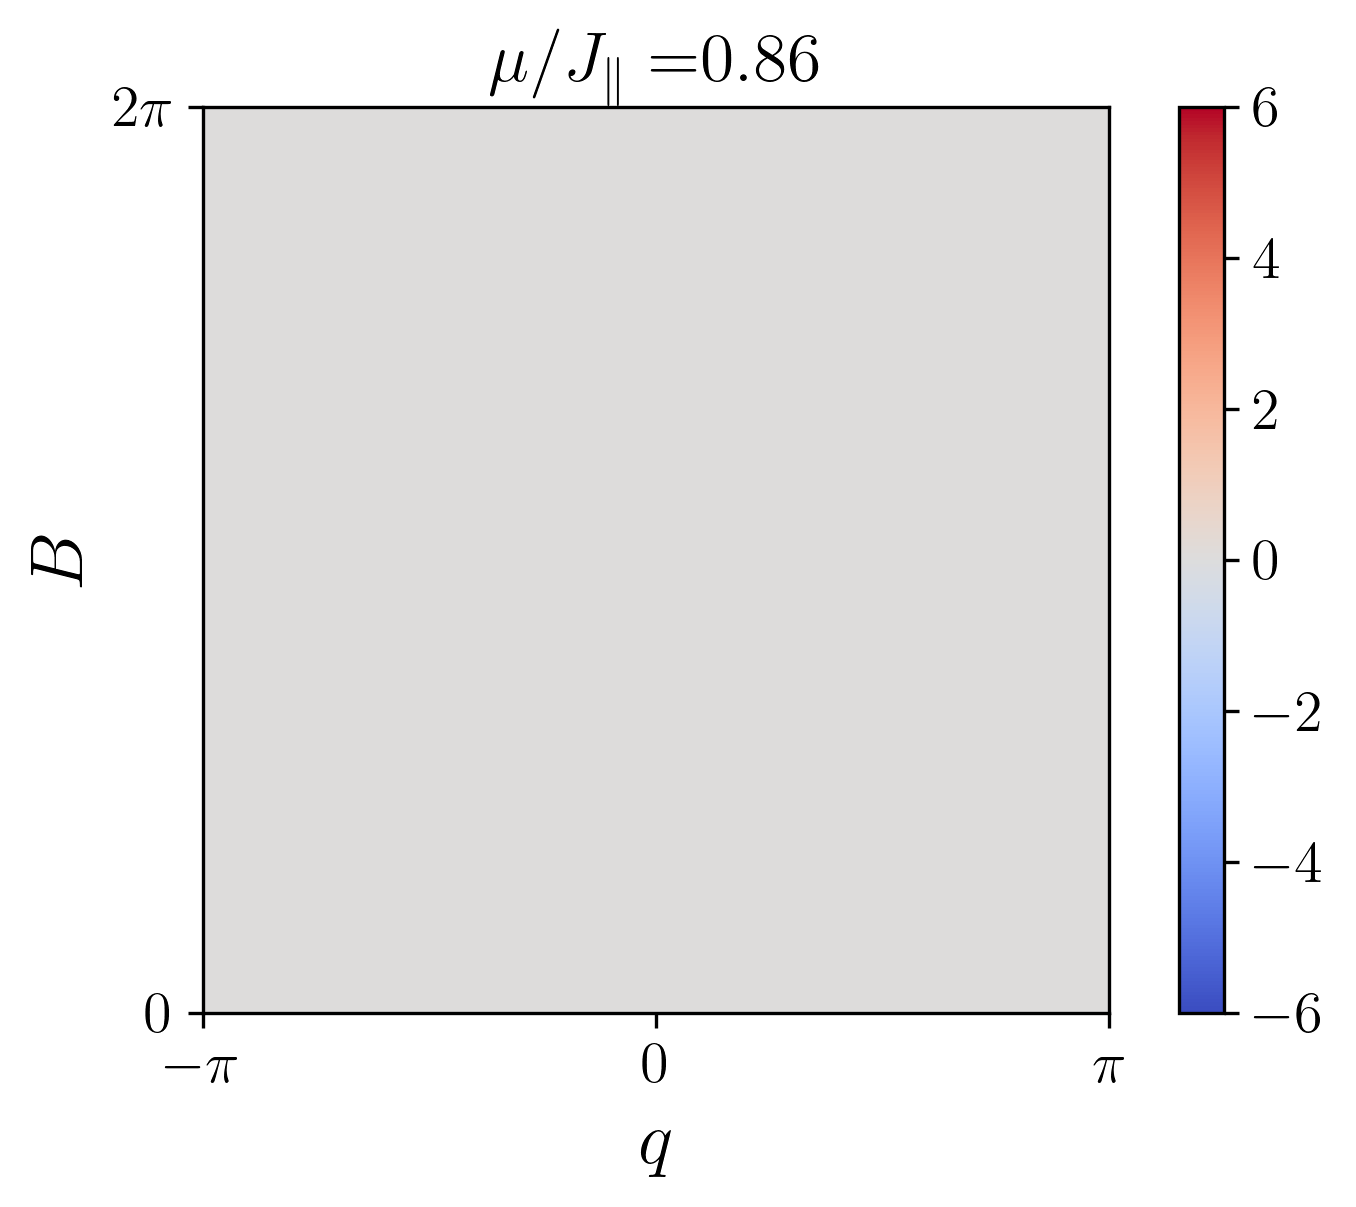

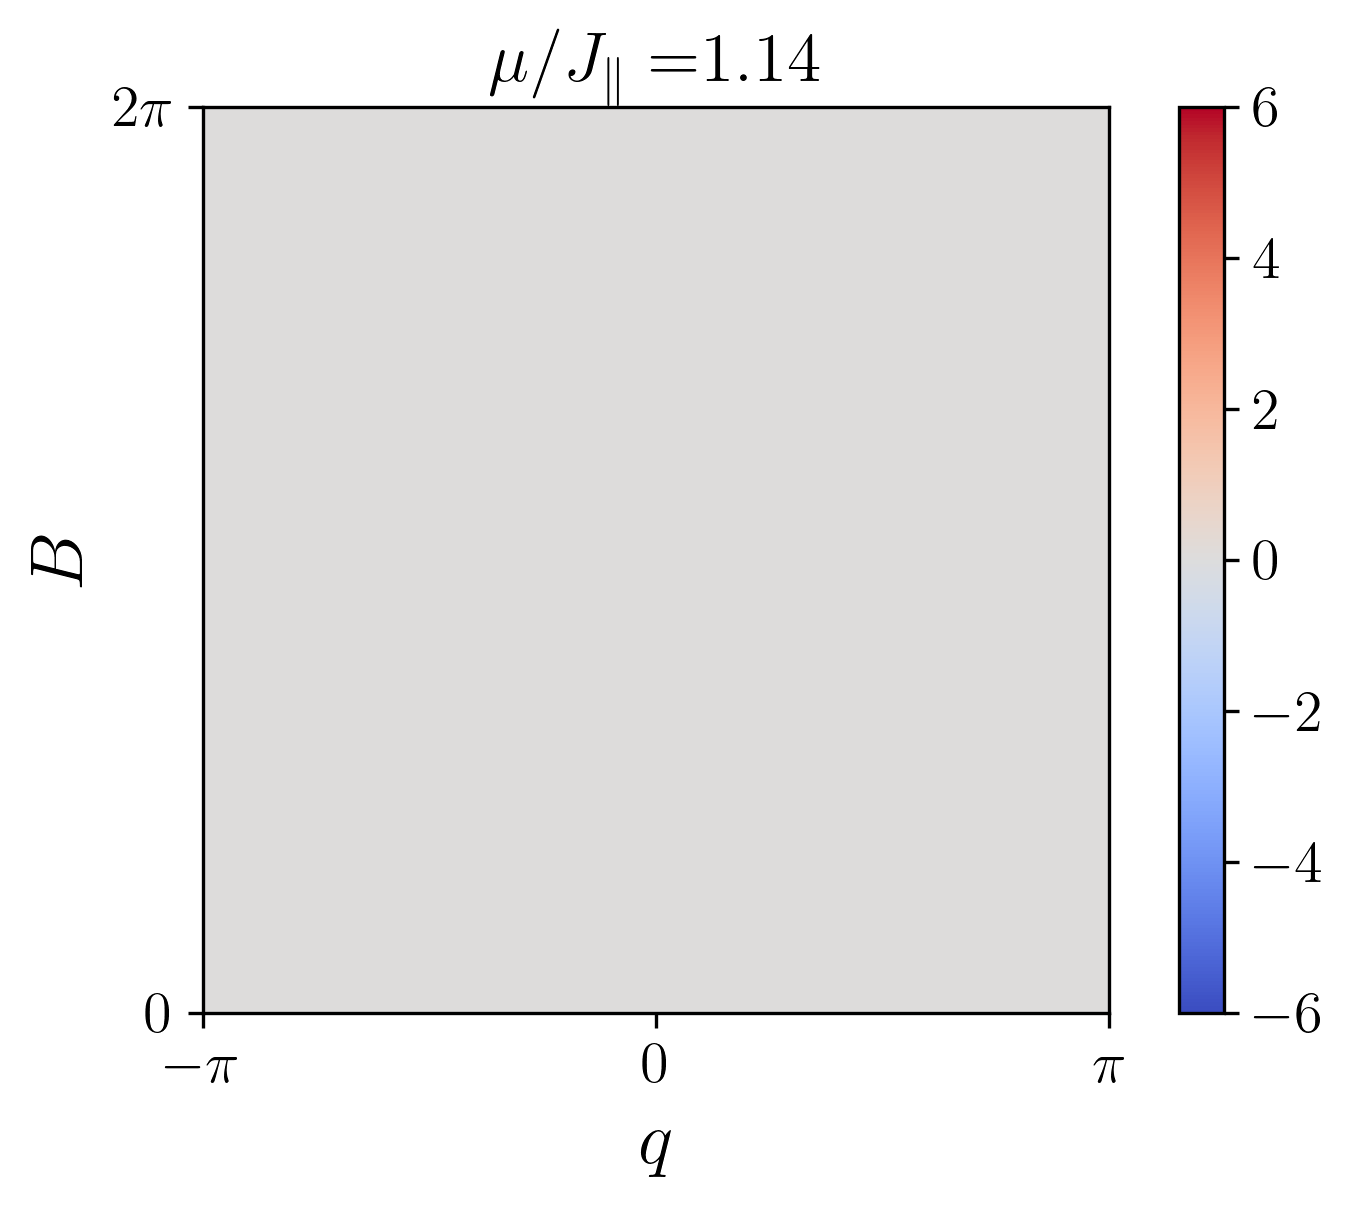

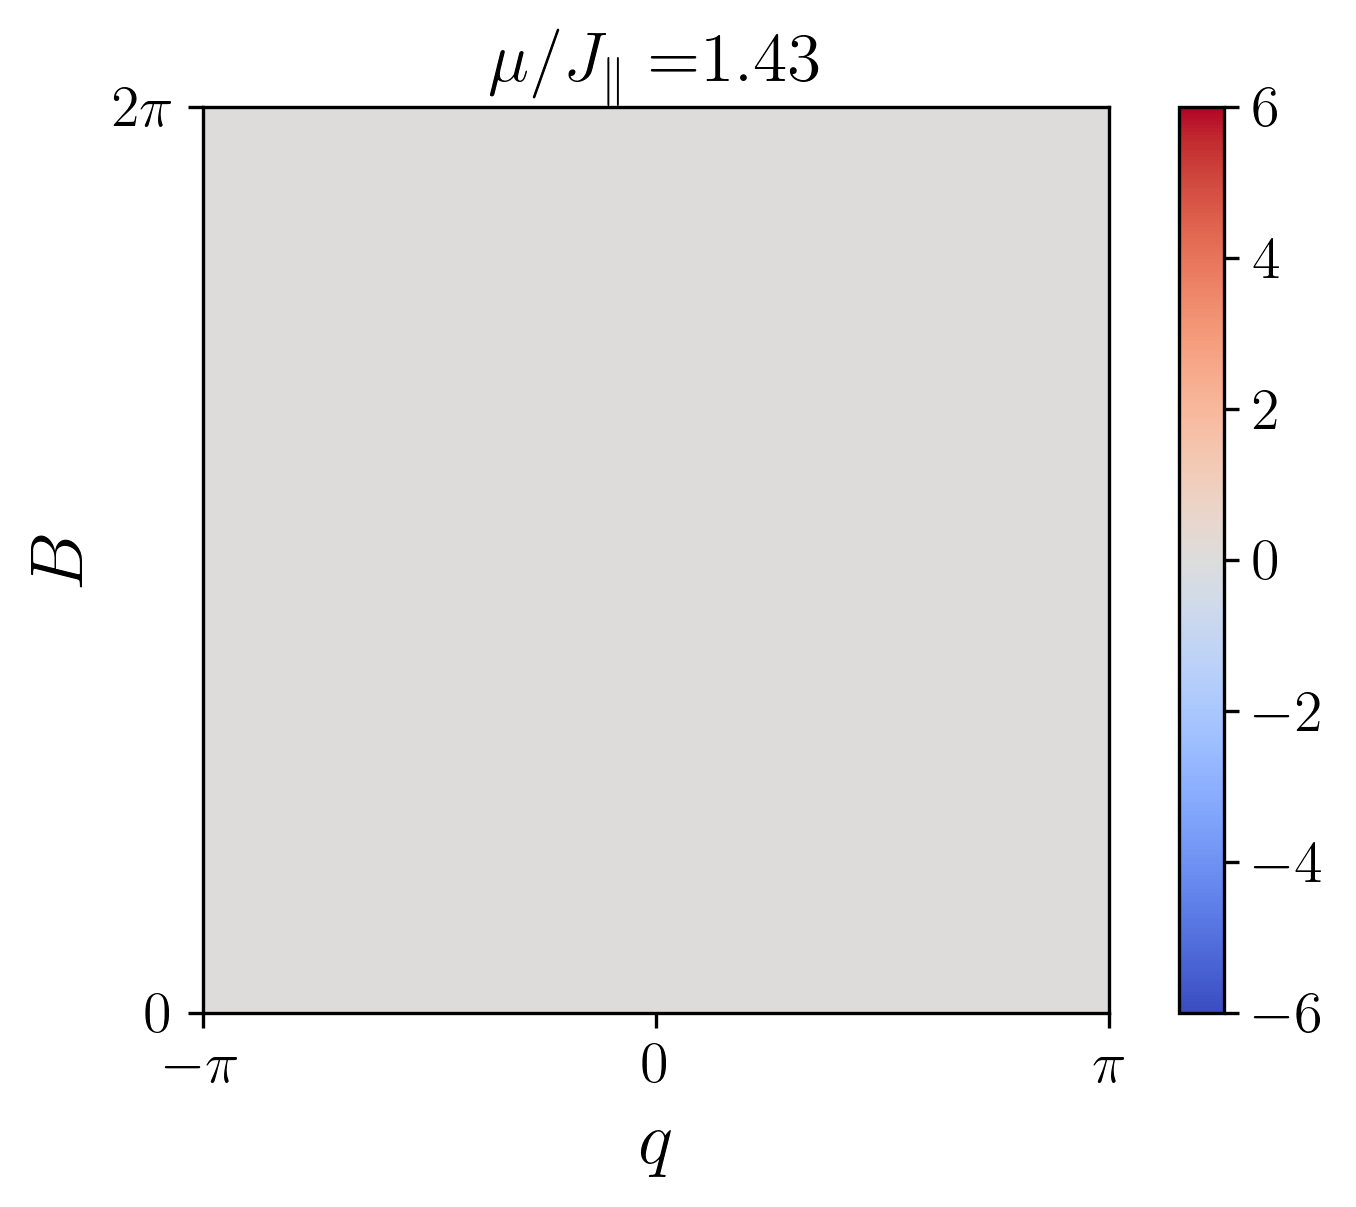

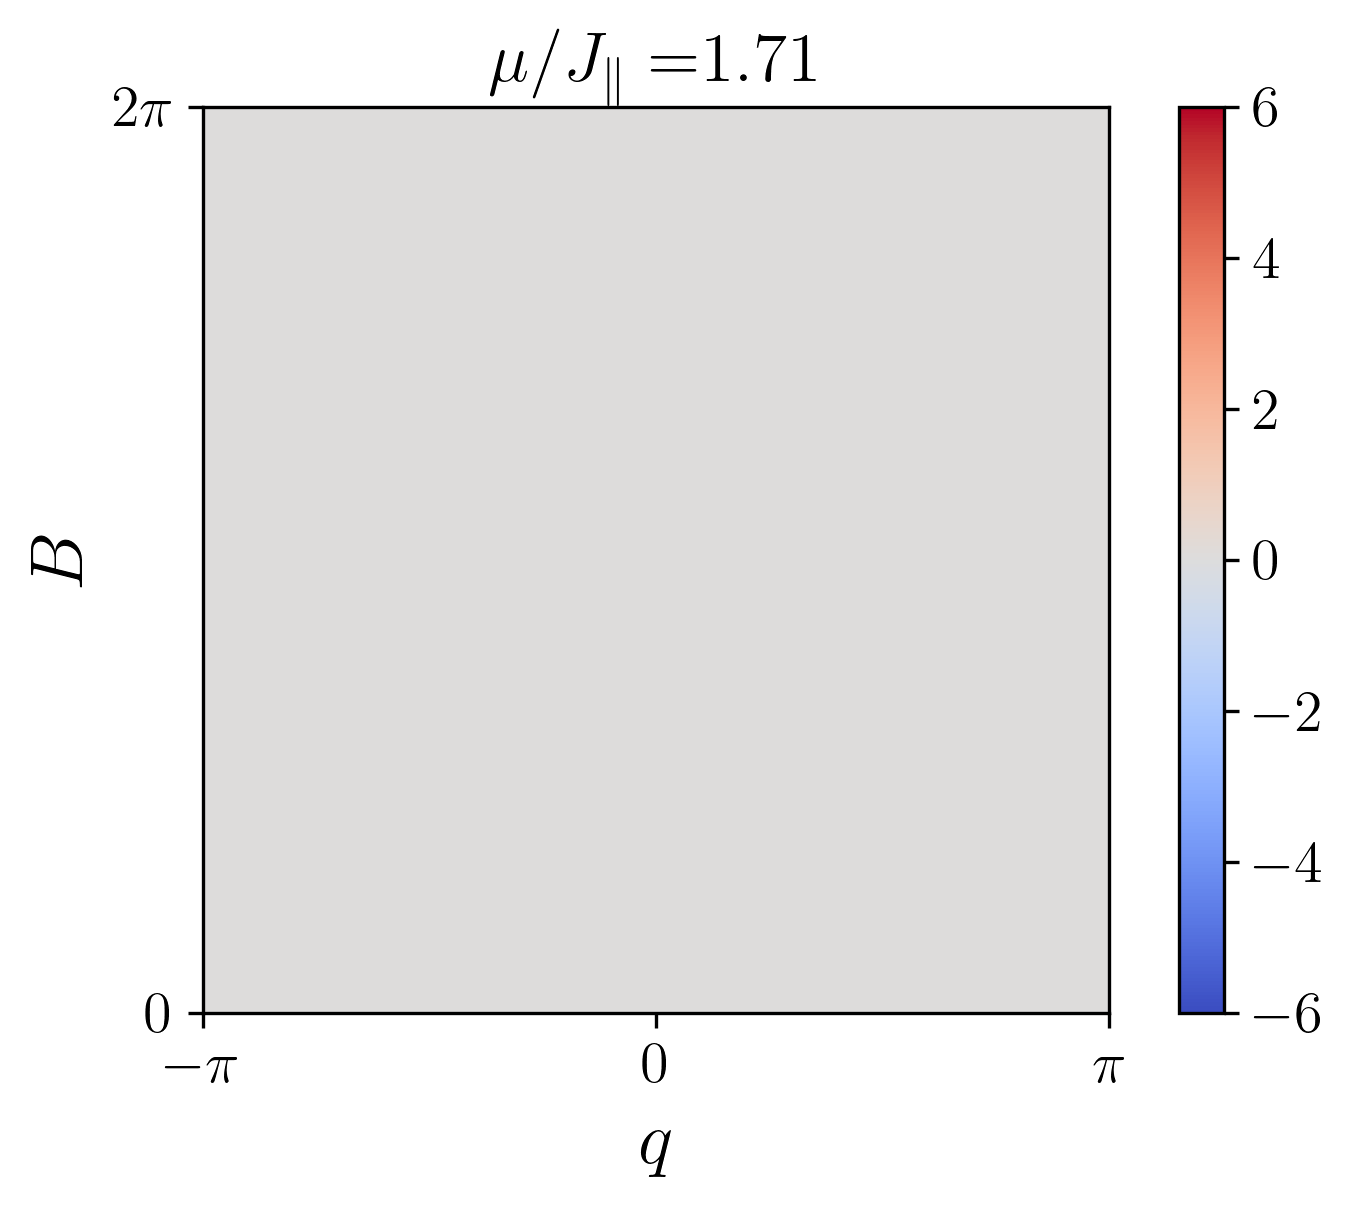

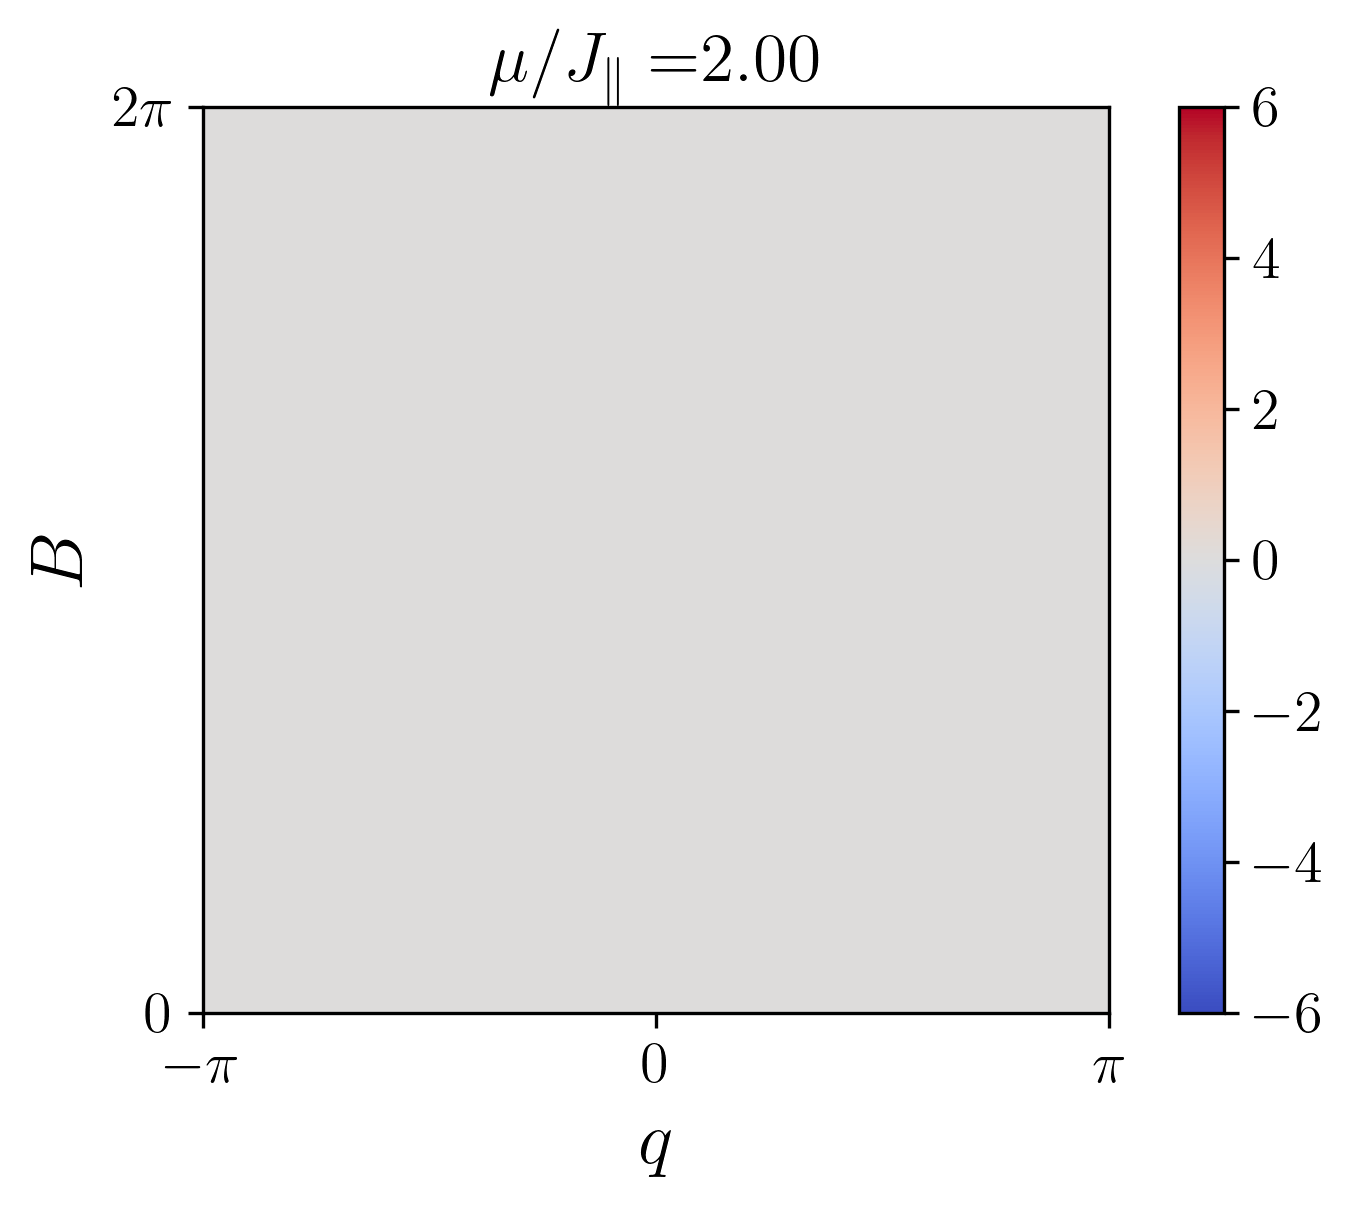

In [48]:
saveFig = False

normed = mclr.Normalize(-6.,6.)

for i in range(nummus):
    plt.imshow(np.real(Piqs[i,:,:]),norm=normed,origin='lower',extent=[-np.pi,np.pi,Bs[0],Bs[-1]],cmap=cm.coolwarm)
    plt.colorbar()
    plt.title(r'$\mu/J_\parallel = $'+"{m:0.2f}".format(m=mus[i]))
    plt.xlabel(r'$q$')
    plt.xticks([-np.pi,0.,np.pi],[r'$-\pi$','0',r'$\pi$'])
    plt.ylabel(r'$B$')
    plt.yticks([0,2.*np.pi],['0',r'$2\pi$'])
    
    if saveFig:
        plt.savefig(figDir+"PiHall_mu={m:0.2f}.pdf".format(m=mus[i]),bbox_inches='tight')
    plt.show()
    
saveFig = False